## Méthodes d'interprétation globales indépendantes du modèle

Dans le chapitre précédent, chapitre 4, Principes fondamentaux de l'importance et de l'impact des caractéristiques, nous avons démontré comment l'importance des caractéristiques de permutation était une meilleure alternative à l'exploitation des paramètres intrinsèques du modèle pour classer les caractéristiques en fonction de leur impact sur les résultats du modèle.

 Nous avons également appris à utiliser des diagrammes de dépendance partielle et des diagrammes d'espérance conditionnelle individuels pour examiner comment les résultats du modèle changent à travers les valeurs de caractéristiques et les interactions. Cependant, même si toutes ces méthodes globales indépendantes du modèle sont extrêmement populaires, elles ont quelque chose en commun : elles sont sensibles aux caractéristiques colinéaires.


Ce chapitre continuera à examiner les méthodes globales indépendantes du modèle, dont deux ont été conçues pour atténuer principalement l'impact de la multicolinéarité avec une base statistique très solide. 

Le premier est SHApley Additive ExPlanations (SHAP), qui, pour la plupart, adhère aux principes mathématiques des valeurs de Shapley dérivés de la théorie des jeux coalitionnels. La seconde consiste à utiliser des graphiques d'effets locaux accumulés (ALE), qui, en utilisant des distributions marginales conditionnelles, offrent une meilleure alternative aux graphiques de dépendance partielle (PDP). Enfin, une autre façon courante d'expliquer les modèles de boîte noire consiste à utiliser des modèles de boîte blanche qui les approximent, nous aborderons donc le vaste sujet des substituts globaux, qui peuvent être des outils d'interprétation très précis et efficaces lorsqu'ils sont choisis correctement.

Ce sont les principaux sujets que nous allons couvrir dans ce chapitre : 

* En savoir plus sur les valeurs de Shapley 
* Interprétation des graphiques de synthèse et de dépendance SHAP 
* Exploration des graphiques ALE 
* Explication des modèles de boîte noire avec des substituts globaux

## La mission

L'efficacité énergétique est une préoccupation importante des consommateurs qui souhaitent dépenser ou polluer moins. Par conséquent, il est du ressort des décideurs politiques, des régulateurs, des militants écologistes, des responsables de la santé publique et des fabricants de technologies consommatrices d'énergie. Aux États-Unis seulement, le secteur des transports représentait 28 % (https://www.eia.gov/energyexplained/use-of-energy/transportation.php) de la consommation totale d'énergie en 2019, dont plus de la moitié est consommée par des véhicules de tourisme légers. Et même s'il y a eu une augmentation de parc de  voitures électriques aux États-Unis au cours de la dernière décennie, la majeure partie de leur électricité provient toujours de centrales électriques à combustibles fossiles. En fin de compte, cela signifie que tous les véhicules de tourisme ont une empreinte carbone quel que soit leur type de carburant.


Pour cet exercice, disons que l'organisation à but non lucratif de défense des consommateurs basée aux États-Unis pour laquelle vous travaillez se concentre traditionnellement sur la sécurité automobile et que les pratiques de vente frauduleuses détournent leur attention vers l'eficacité énergétique. 

Les lois sur la sécurité promulguées au cours des dernières décennies ont considérablement réduit la responsabilité des fabricants en améliorant le contrôle de la qualité et les réglementations. Bien que la sécurité soit toujours une préoccupation, elle est principalement due à une conduite imprudente et à de mauvaises conditions atmosphériques. Les pannes mécaniques ne sont à l'origine que de 2 à 3 % de tous les accidents de voiture. Ce n'est que très occasionnellement que cela peut être attribué à un véhicule ou à des fabricants de pièces telles que les freins, la suspension, la transmission ou les pneus. l'asbl se vante d'avoir également très bien réussi à lutter contre la fraude et les pratiques discriminatoires des concessionnaires automobiles. 

Réalisant que les jeunes générations sont à la fois soucieuses de l'environnement et des ressources, elles veulent rester pertinentes en plaidant pour l'efficacité énergétique, qui peut être mesurée en miles par gallon (MPG). Plus ce nombre est élevé, plus il est efficace. 

Heureusement, le département américain de l'Énergie (https://www.fueleconomy.gov/feg/ws/) enregistre ce nombre pour tous les véhicules du pays depuis 1984. L'association veut expliquer comment tous les différentes variables ont eu un impact sur MPG au cours des dernières décennies dans leurs brochures. En tant que data scientist résident, ils aimeraient que vous trouviez les prédicteurs d'efficacité énergétique les plus significatifs et que vous les illustriez éventuellement d'une manière interprétable par l'homme.

## L'approche

Vous avez reçu un ensemble de données avec des milliers de modèles de véhicules. Il comprend des détails généraux, du moteur, de la pollution, de la transmission, du châssis et techniques pour chaque modèle. Pour trouver les prédicteurs de MPG, vous pouvez utiliser des méthodes statistiques éprouvées telles que les tests d'hypothèses, l'analyse de corrélation et des modèles intrinsèquement interprétables tels que les GLM pour acquérir une solide compréhension des données. 

Cependant, vous devrez vous assurer que vous utilisez les bonnes méthodes statistiques au cas par cas et vérifier que vos données répondent à leurs hypothèses sous-jacentes. Et même après tout cela, vos modèles intrinsèques manqueront de précision prédictive sufsante pour étayer des résultats.

 De nombreux praticiens font confiance à cette approche classique. Cependant, ce guide favorise l'idée que les modèles de boîte noire peuvent extraire plus de connaissances des données et de manière plus fiable et efficace qu'avec l'approche classique. L'apprentissage automatique interprétable fournit l'ensemble d'outils pour le faire.

 À cette fin, prenons un raccourci en sept points qui n'est pas enseigné en classe de statistiques appliquées !
 
 * 1. Préparez toutes les fonctionnalités juste pour qu'elles n'aient pas de valeurs nulles et qu'elles soient toutes numériques.
 
 * 2. Assurez-vous qu'avec ces fonctionnalités, vous pouvez bien prédire MPG en utilisant des modèles de boîte noire. Nous utiliserons des réseaux de neurones et XGBoost pour cet exemple.
 
 * 3. Évaluez l'ensemble de données de test pour vous assurer qu'il n'est pas trop excessif.
 
 * 4. Utilisez SHAP pour comprendre comment ils sont parvenus à leurs conclusions.

 5. Effectuez des tests statistiques pour examiner plus en détail les associations bivariées et exclure toute fausse corrélation et tout biais systématique.
 
 * 6. Explorez davantage les effets des fonctionnalités sur les modèles avec ALE plots.
 
 * 7. Mieux comprendre les règles sous-jacentes du modèle avec des substituts globaux.Commençons !

In [ ]:
!pip install --upgrade machine-learning-datasets
!pip install git+https://github.com/tensorflow/docs
!pip install --upgrade rulefit shap
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

     |████████████████████████████████| 312 kB 8.0 MB/s 
     |████████████████████████████████| 60.3 MB 57 kB/s 
     |████████████████████████████████| 7.1 MB 42.2 MB/s 
     |████████████████████████████████| 165 kB 12.7 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 394.5 MB 38 kB/s 
     |████████████████████████████████| 28.0 MB 1.6 MB/s 
     |████████████████████████████████| 2.9 MB 31.0 MB/s 
     |████████████████████████████████| 462 kB 48.6 MB/s 
     |████████████████████████████████| 3.8 MB 44.8 MB/s 
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3639 sha256=44dce8c88b5df09dbde67a18aa54be8775d070ae769bdcb5d06c52cf68157946
  Stored in directory: /root/.cache/pip/wheels/cc/0d/0a/06236a41d8f5c3485c1057262de55329e227a0c239fd00d0cd
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052157 sha256=3c7d1e1b28f9183ef582d267a99d6fbe373b7c7deb678b7f87

In [ ]:
# Loading the Libraries
import math
import os
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import xgboost as xgb
from rulefit import RuleFit
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from alepython import ale_plot

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


Vérifions que TensorFlow a chargé la bonne version avec la commande print(tf.__version__). Il devrait être 2.0 ou supérieur

In [ ]:
print(tf.__version__)

2.4.4


## Comprendre et préparer les données

Maintenant, nous chargeons les données dans un dataframe que nous appellerons fueleconomy_df. Veuillez noter que nous utilisons prepare=True, qui prépare automatiquement les fonctionnalités pour vous afin que vous n'ayez pas à :

In [ ]:
fueleconomy_df = mldatasets.load("vehicle-fueleconomy", prepare=True)

https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip downloaded to /content/data/vehicles.csv.zip
/content/data/vehicles.csv.zip uncompressed to /content/data/vehicles.csv
1 dataset files found in /content/data/vehicles.csv folder
parsing /content/data/vehicles.csv/vehicles.csv


Il devrait y avoir plus de 43 000 enregistrements et 84 colonnes. On peut vérifier que c'est le cas avec info() :

In [ ]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 85 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   make                                       44554 non-null  object 
 1   model                                      44554 non-null  object 
 2   year                                       44554 non-null  int16  
 3   cylinders                                  44554 non-null  float32
 4   displ                                      44554 non-null  float32
 5   phevBlended                                44554 non-null  bool   
 6   co2TailpipeGpm                             44554 non-null  float32
 7   co2                                        44554 non-null  int16  
 8   ghgScore                                   44554 non-null  int16  
 9   pv4                                        44554 non-null  int16  
 10  lv4                   

La sortie devrait vérifier. Toutes les fonctionnalités sont numériques sans valeurs manquantes, et les fonctionnalités catégorielles ont déjà été encodées à chaud pour nous car nous avons utilisé prepare=True.

## Le dictionnaire de données

il  ne contient que 25 caractéristiques, mais elles deviennent 84 colonnes en raison de l'encodage catégoriel, dont 3 général, 6 moteur, 3 pollution, 3 transmission, 7 châssis, 2 électronique et une caractéristique cible dans l'ensemble de données. Nous pouvons décrire le dictionnaire de données ventilé par ces catégories. Voici une liste des caractéristiques de la catégorie générale : 

* make : catégorique - la marque ou le fabricant du véhicule (sur près de 140 différents)
* model : catégorique - le modèle du véhicule (sur plus de 4 000 différents)
* year : Ordinal – année du modèle (de 1984 à 2021 )


Les caractéristiques suivantes sont des caractéristiques du moteur :

* fuelType : catégorique – le principal type de carburant utilisé par le moteur.* cylindres : ordinal – le nombre de cylindres du moteur (de 2 à 16 ). En règle générale, plus il y a de cylindres, plus la puissance est élevée.
* displ : Continu - la cylindrée du moteur (en litres de 0,6 à 8,4 ).
* eng_dscr : Texte - une description du moteur composée d'un ou plusieurs codes concaténés ensemble (codes trouvés ici : https://www.fueleconomy.gov/feg/findacarhelp.shtml#engine).

* phevBlended : binaire - PHEV signifie Plug-In-Hybrid Vehicle et Blended signifie que le véhicule sera alimenté par la batterie et uniquement complété par carburant. Si c'est vrai, il utilise ce mode de fonctionnement, appelé mode d'épuisement de la charge. 

* atvType : catégoriel – types ou technologies de carburant alternatifs utilisés dans le moteur (sur 8 différents)


Voici les caractéristiques de pollution de l'ensemble de données :

* co2TailpipeGpm : continu – CO2 d'échappement en grammes/mile.
* co2 : Continu : CO2 d'échappement en grammes/mile. Pour les modèles postérieurs à 2013, il est basé sur des tests EPA. Pour les années précédentes, le CO2 est estimé à l'aide d'un facteur d'émission de l'EPA (−1 =Non disponible)
* ghgScore : Ordinal – EPA GHG score (de 0 − 10 , −1 =Non disponible).


Nous avons les caractéristiques de transmission suivantes : 

* drive : catégorique – type d'essieu moteur du véhicule (parmi 7 différents) 
* trany : catégorique – descripteur de transmission principalement sous la forme « {type}, {vitesse}-vitesse », où le le type uniquement peut être Manuel ou Automatique

* trans_dscr : Texte : une description plus détaillée de la transmission composée d'un ou plusieurs codes concaténés (codes trouvés ici : https://www.fueleconomy.gov/feg/findacarhelp.shtml#trany) 


Voici une liste des caractéristiques du châssis :

* VClass : catégorique – type de véhicule (sur 34 différents)
* pv4 : continu : volume des passagers à 4 portes (en pieds cubes)
* lv4 : continu : volume des bagages à 4 portes ( en pieds cubes)
* lv2 : continu – volume de bagages à 2 portes (en pieds cubes)
* pv2 : continu : volume des passagers à 2 portes (en pieds cubes)
* hlv : continu : volume des passagers du hayon (en pieds cubes)
* hpv : continu : volume des bagages du hayon (en pieds cubes)


les caractéristiques électroniques sont les suivantes :

* startStop : Catégorique – technologie start-stop incluse dans le véhicule (O : = oui, N=non, vierge=véhicules plus anciens)
* tCharger : catégorique : le véhicule est suralimenté (T=oui, vierge=autrement)

ce qui suit est la caractéristique cible :

* comb08 : Continu – MPG combiné. Pour les véhicules électriques et GNC, ce nombre est MPGe (milles équivalent essence par gallon). 


Maintenant que nous avons jeté un coup d'œil aux données, nous pouvons préparer brièvement les données pour la modélisation, puis tester quelques modèles !

## Préparation des données

Comme vous pouvez le constater par le résumé info(), il n'y avait pas de fichiers NULL ; nous avons de nombreuses colonnes codées catégorielles et toutes les colonnes sont soit numériques, soit booléennes, à l'exception de la marque et du modèle, que nous supprimerons. L'ensemble de données est presque prêt. Il ne nous reste plus qu'à diviser l'ensemble de données en ensembles de données d'apprentissage, de test et de validation. Pour ce faire, nous avons d'abord mis notre fonctionnalité cible seule dans y, tout le reste sauf make et model dans X, puis nous avons divisé X et y en train (85%) et test (15%) puis X_train et Y_train en train (80 %) et validation (20 %). Comme d'habitude, il est essentiel de définir une graine que nous appelons rand pour notre random_state afin d'assurer la reproductibilité

In [ ]:
rand = 9
y = fueleconomy_df['comb08']
X = fueleconomy_df.drop(['comb08','make','model'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                    test_size=0.15, random_state=rand)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,\
                                    test_size=0.2, random_state=rand)

## Modélisation et évaluation des performances pour les réseaux de neurones profonds 

Les incohérences dans les résultats du modèle sont aggravées par des difficultés d'interprétation, c'est pourquoi la reproductibilité est primordiale. Cependant, la reproductibilité du réseau neuronal peut être notoirement difficile à assurer, et étant donné leur nature stochastique, il est encore plus critique de définir la graine pour avoir des résultats quelque peu cohérents. Le code suivant a tendance à fonctionner pour TensorFlow 2.0+ :

In [ ]:
os.environ['PYTHONHASHSEED']=str(rand)
tf.random.set_seed(rand)
np.random.seed(rand)

Nous allons créer un réseau de neurones feedforward (séquentiel) avec deux couches cachées avec 64 nœuds cachés chacune. Dans Keras, cela peut être réalisé en ajoutant les couches d'entrée, cachée (Dense (64)) et de sortie (Dense (1)). Entre l'entrée et la première couche cachée, nous ajoutons également une couche de normalisation. Cette couche normalise toutes les entités pour avoir une moyenne de 0 et un écart type de 1 . Cette étape est généralement effectuée dans une étape de pré-traitement distincte, mais il y a de nombreux avantages à avoir un pipeline de modèle ou un modèle lui-même qui s'occupe de cette étape, y compris un code plus propre et une fiabilité accrue. Après avoir construit notre modèle (fitted_nn_model), nous pouvons compiler en utilisant l'erreur quadratique moyenne (MSE) comme perte et uniquement métrique (metrics=['mse']). Nous utiliserons l'optimiseur Adam avec un taux d'apprentissage très faible ( lr = 0,0005). Cela rendra l'apprentissage plus lent, mais il a convergé à un MSE inférieur avec cette valeur d'hyperparamètre. Vous pouvez utiliser summary() pour imprimer tous les calques avec des formes et des paramètres pour chacun

In [ ]:
fitted_nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=[len(X_train.keys())]),
    tf.keras.layers.experimental.preprocessing.Normalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])
fitted_nn_model.compile(loss='mean_squared_error',\
                optimizer=tf.keras.optimizers.Adam(lr = 0.0005),\
                metrics=['mse'])
fitted_nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 82)                165       
_________________________________________________________________
dense (Dense)                (None, 64)                5312      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,702
Trainable params: 9,537
Non-trainable params: 165
_________________________________________________________________


Le réseau devrait converger quelque part entre les 700e et 1300e époques. Plutôt que de viser un nombre d'époques fixe, nous pouvons le fixer à 3 000 et implémenter un arrêt anticipé comme rappel dans la fonction fit. Ce rappel EarlyStopping surveillera la perte de validation et verra si elle ne s'est pas améliorée au cours des 200 dernières époques (patience) avec un minimum extrêmement bas pour être qualifié d'amélioration (min_delta = 0,0001). On s'assure également de restituer les poids de l'époque avec la meilleure perte de validation (restore_best_weights=True). Lorsque nous adaptons le modèle, nous pouvons stocker l'historique d'entraînement (nn_history) :

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,\
                                      patience=200, min_delta=0.0005,\
                                      restore_best_weights=True)
nn_history = fitted_nn_model.fit(\
                X_train.astype(float), y_train.astype(float), epochs=3000, batch_size=128,\
                validation_data=(X_val.values.astype(float), y_val.values.astype(float)), verbose=1,\
                                 callbacks=[es])

Epoch 1/3000
237/237 [==============================] - 2s 7ms/step - loss: 1573.9962 - mse: 1573.9962 - val_loss: 10.3122 - val_mse: 10.3122
Epoch 2/3000
237/237 [==============================] - 1s 4ms/step - loss: 11.7018 - mse: 11.7018 - val_loss: 7.8179 - val_mse: 7.8179
Epoch 3/3000
237/237 [==============================] - 1s 4ms/step - loss: 9.0926 - mse: 9.0926 - val_loss: 5.9102 - val_mse: 5.9102
Epoch 4/3000
237/237 [==============================] - 1s 4ms/step - loss: 7.4232 - mse: 7.4232 - val_loss: 5.0235 - val_mse: 5.0235
Epoch 5/3000
237/237 [==============================] - 1s 4ms/step - loss: 6.5640 - mse: 6.5640 - val_loss: 4.4393 - val_mse: 4.4393
Epoch 6/3000
237/237 [==============================] - 1s 5ms/step - loss: 5.9926 - mse: 5.9926 - val_loss: 3.9063 - val_mse: 3.9063
Epoch 7/3000
237/237 [==============================] - 1s 4ms/step - loss: 4.9664 - mse: 4.9664 - val_loss: 3.5821 - val_mse: 3.5821
Epoch 8/3000
237/237 [==============================

La bibliothèque tensorflow_docs est livrée avec un traceur spécialement conçu pour l'historique d'entraînement (HistoryPlotter), ce qui est fantastique car vous pouvez tracer l'historique en une ou deux lignes de code

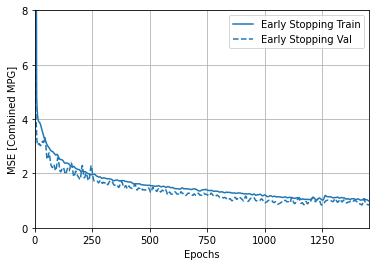

In [ ]:
nn_plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
nn_plotter.plot({'Early Stopping': nn_history}, metric = "mse")
plt.rc("figure", figsize=(14, 10))
plt.rcParams.update({'font.size': 14})
plt.ylabel('MSE [Combined MPG]')
plt.ylim([0, 8])
plt.show()

Le code précédent a produit la Figure. Il montre comment, après 750 époques, le MSE de validation oscille autour de 0,75 à son minimum, de sorte que l'arrêt précoce est déclenché

In [ ]:
y_train_nn_pred = fitted_nn_model(X_train.astype(float))
y_test_nn_pred = fitted_nn_model.predict(X_test.astype(float))
RMSE_nn_train = metrics.mean_squared_error(y_train,\
                                        y_train_nn_pred, squared=False)
RMSE_nn_test = metrics.mean_squared_error(y_test,\
                                        y_test_nn_pred, squared=False)
R2_nn_test = metrics.r2_score(y_test, y_test_nn_pred)
print('RMSE_train: %.4f\tRMSE_test: %.4f\tr2: %.4f' %\
                    (RMSE_nn_train, RMSE_nn_test, R2_nn_test))

RMSE_train: 0.8961	RMSE_test: 1.2384	r2: 0.9804


Les scores RMSE pour l'entraînement et le test sont suffisamment proches, ce qui suggère un overtting minimal, et tout RMSE inférieur à un est excellent car cela signifie qu'en moyenne, le MPG combiné prévu ne dépasse pas 1MPG du MPG combiné observé. De plus, un R au carré de 99 % signifie que le modèle explique une écrasante majorité de la variabilité


Nous pouvons également visualiser à quel point le modèle fit en traçant le y observé par rapport à prédit (MPG combiné) avec une ligne de régression. Nous pouvons utiliser pour cela la fonction regplot de seaborn, qui peut livrer cette parcelle en une seule ligne. Nous allons personnaliser le nuage de points pour que chaque point de données apparaisse comme 30 % transparent ('alpha' : 0.3) et vert (color="g"), les étiquettes d'axe et les tailles de police

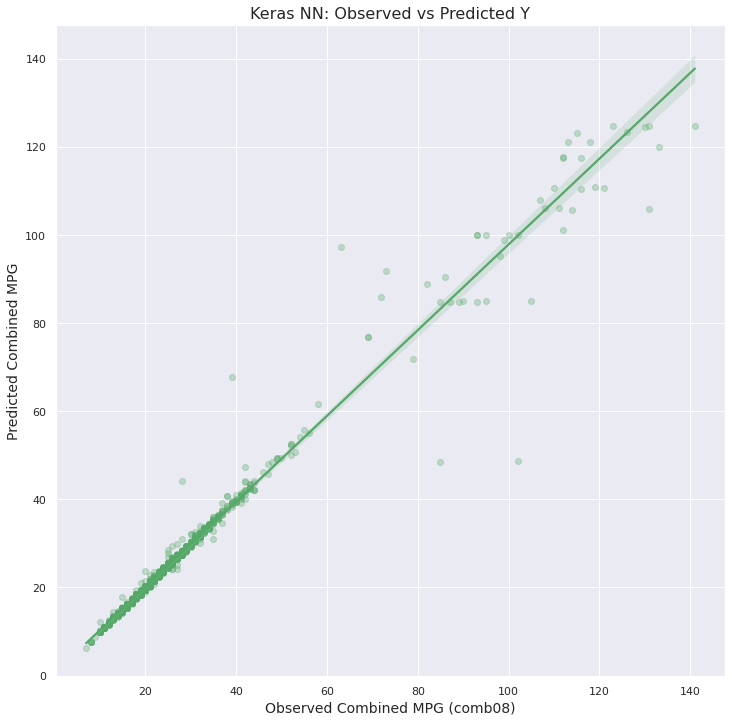

In [ ]:
sns.set()
plt.figure(figsize = (12,12))
plt.title('Keras NN: Observed vs Predicted Y', fontsize=16)
plt.ylabel('Predicted Combined MPG', fontsize=14)
sns.regplot(x=y_test, y=y_test_nn_pred, color="g",\
            scatter_kws={'alpha':0.3})
plt.xlabel('Observed Combined MPG (comb08)', fontsize=14)
plt.show() 

Le graphique de la figure montre à quel point le modèle prédit le MPG combiné réel. Les points sont les plus proches de la droite de régression dans le quadrant inférieur gauche, ce qui suggère que plus la valeur est faible, meilleur est le modèle pour la prédire, ce qui n'est pas surprenant compte tenu du nombre de points supplémentaires dans le quadrant inférieur gauche. quadrant que dans celui en haut à droite. Nous pouvons procéder à la formation d'un modèle XGBoost !

## Modélisation et évaluation des performances pour XGBoost

XGBoost est une bibliothèque qui implémente des arbres de décision boostés par gradient, un peu comme GradientBoostingRegressor de scikit-learn, une méthode d'ensemble que nous avons utilisée dans les chapitres précédents. Cependant, alors que scikit-learn suit l'algorithme d'amplification du gradient d'origine à la perfection, XGBoost a mis en œuvre plusieurs optimisations qui le rendent plus rapide et plus évolutif, augmentent les performances prédictives et le rendent potentiellement encore moins sujet au sur-déploiement. XGBoost nécessite que vous stockiez vos données dans des objets DMatrix pour augmenter encore plus l'efficacité, comme ceci :

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

Pour cet exercice, nous utiliserons le wrapper scikit-learn de XGBoost, qui convertit automatiquement les données en objets DMatrix. La raison en est que de nombreuses méthodes d'interprétation indépendantes du modèle s'attendent à ce que vous utilisiez des fonctions qui suivent le modèle popularisé par scikit-learn, telles que fit(X, y) et predict(X), où X et y sont des tableaux ou clairsemés. matrices, généralement des tableaux NumPy ou des DataFrames pandas. Cependant, XGBoost n'est pas conforme à cette attente car DMatrix est un type de données entièrement différent. Néanmoins, les méthodes d'interprétation restent techniquement indépendantes du modèle car elles ne dépendent pas des paramètres intrinsèques du modèle. 

Pourtant, en pratique, vous devriez écrire une classe qui agit comme intermédiaire, un peu comme le fait l'encapsuleur scikit-learn dans ce cas. Le seul inconvénient est que la bibliothèque XGBoost a de nombreux paramètres non disponibles dans le wrapper. Heureusement, nous n'avons pas eu besoin d'en utiliser beaucoup dans ce cas. Il nous suffit de définir la profondeur maximale de l'arbre à 7 (max_depth), le taux d'apprentissage à 0,6 (learning_rate) et notre objectif en tant que régression minimisant l'erreur au carré (reg:squarederror), puis d'exécuter 4 tâches en parallèle (n_jobs). Il est facile d'adapter le modèle tout en évaluant le RMSE en utilisant à la fois les ensembles de données d'apprentissage et de validation

In [ ]:
fitted_xgb_model = xgb.XGBRegressor(max_depth=7, learning_rate=0.6,\
                    n_jobs=4, objective='reg:squarederror',\
                    random_state=rand, n_estimators=50).\
                    fit(X_train, y_train,\
                    eval_set=[(X_train, y_train),(X_val, y_val)],\
                    eval_metric='rmse')

[0]	validation_0-rmse:9.11945	validation_1-rmse:8.92051
[1]	validation_0-rmse:3.80118	validation_1-rmse:3.68498
[2]	validation_0-rmse:1.7268	validation_1-rmse:1.6792
[3]	validation_0-rmse:0.957798	validation_1-rmse:0.935891
[4]	validation_0-rmse:0.736531	validation_1-rmse:0.722361
[5]	validation_0-rmse:0.67006	validation_1-rmse:0.674443
[6]	validation_0-rmse:0.635874	validation_1-rmse:0.67503
[7]	validation_0-rmse:0.614717	validation_1-rmse:0.67784
[8]	validation_0-rmse:0.557452	validation_1-rmse:0.692609
[9]	validation_0-rmse:0.532154	validation_1-rmse:0.703098
[10]	validation_0-rmse:0.511417	validation_1-rmse:0.689147
[11]	validation_0-rmse:0.501766	validation_1-rmse:0.684888
[12]	validation_0-rmse:0.482544	validation_1-rmse:0.659395
[13]	validation_0-rmse:0.477891	validation_1-rmse:0.652203
[14]	validation_0-rmse:0.47635	validation_1-rmse:0.651314
[15]	validation_0-rmse:0.469079	validation_1-rmse:0.652824
[16]	validation_0-rmse:0.45887	validation_1-rmse:0.649434
[17]	validation_0-rm

Une fois le modèle ajusté, nous pouvons tracer l'historique de l'entraînement avec matplotlib. Cet historique peut être récupéré à partir du modèle tted XGBoost à l'aide de la fonction evals_result(), qui renvoie un dictionnaire. Puisque nous avons placé deux ensembles de données de validation dans eval_set, ce dictionnaire a deux éléments nommés validation_0 et validation_1. Le premier correspond à l'évaluation de la formation, et le second à la validation

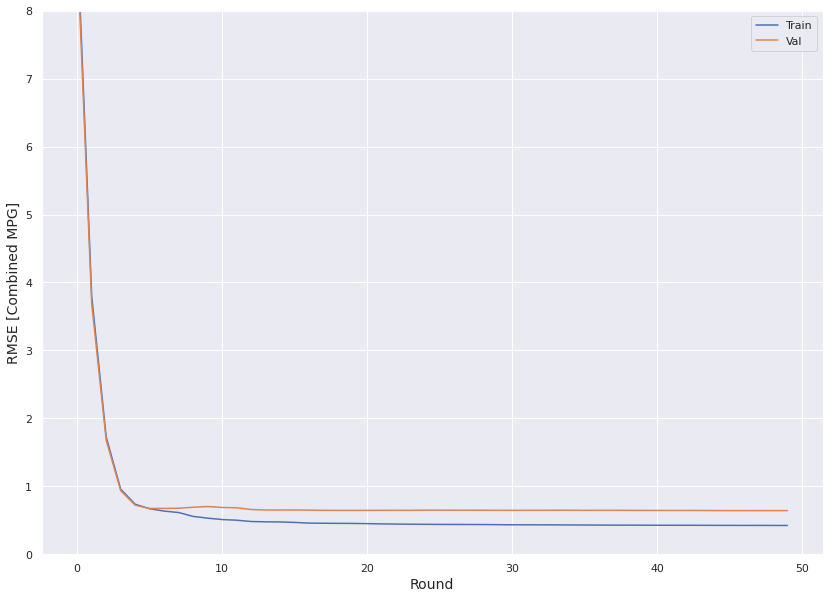

In [ ]:
plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size': 14})
plt.plot(fitted_xgb_model.evals_result()['validation_0']['rmse'])
plt.plot(fitted_xgb_model.evals_result()['validation_1']['rmse'])
plt.ylabel('RMSE [Combined MPG]', fontsize=14)
plt.ylim([0, 8])
plt.xlabel('Round', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Comme vous pouvez le constater sur la figure, le modèle converge rapidement à près de 0,75 RMSE de validation. Bien que l'écart entre la formation et la validation RMSE puisse être potentiellement réduit en ajustant les hyperparamètres, il indique toujours un overftting mineur. Ce n'est pas une préoccupation principale pour un modèle que nous ne prévoyons pas de produire, et l'erreur reste faible avec des données invisibles


Évaluons-nous par rapport à l'ensemble de données de test pour voir si cela est vrai comme nous l'avons fait avec le réseau de neurones :

In [ ]:
y_train_xgb_pred = fitted_xgb_model.predict(X_train)
y_test_xgb_pred = fitted_xgb_model.predict(X_test)
RMSE_xgb_train = math.sqrt(\
                    metrics.mean_squared_error(y_train,\
                                               y_train_xgb_pred))
RMSE_xgb_test = math.sqrt(\
                    metrics.mean_squared_error(y_test,
                                               y_test_xgb_pred))
R2_xgb_test = metrics.r2_score(y_test, y_test_xgb_pred)
print('RMSE_train: %.4f\tRMSE_test: %.4f\tr2: %.4f' %\
                    (RMSE_xgb_train, RMSE_xgb_test, R2_xgb_test))

RMSE_train: 0.4243	RMSE_test: 0.9937	r2: 0.9874


Le RMSE de test et de train est encore plus bas maintenant, et le R-carré encore plus élevé, qu'avec le réseau de neurones, qui était déjà assez bon. Les performances prédictives de ce modèle sont également suffisantes pour être utiles à des fins d'interprétation modulaire globale


En ce qui concerne l'interprétation, comme la plupart des modèles arborescents, XGBoost est livré avec des capacités d'importance des fonctionnalités. XGBoost dispose de trois algorithmes différents pour calculer l'importance des caractéristiques : la fréquence à laquelle la caractéristique apparaît dans l'arbre (poids), la réduction moyenne de l'erreur due à une caractéristique (gain) et le nombre d'observations affectées par un fractionnement. impliquant une caractéristique (couverture). La valeur par défaut est importance_type="poids". En utilisant le code suivant pour plot_importance, vous pouvez essayer les trois et voir à quel point ils varient

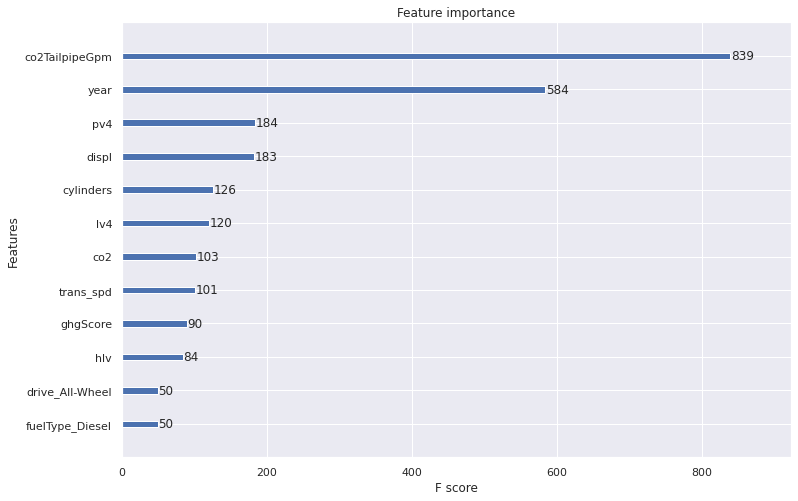

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(fitted_xgb_model, max_num_features=12, ax=ax,\
                    importance_type="weight")
plt.show()

Le code précédent génère la figure, qui décrit l'une des nombreuses façons de calculer l'importance des fonctionnalités pour XGBoost, mais à laquelle devriez-vous faire confiance ? Si vous prenez en considération les principales caractéristiques de toutes ces manières, vous trouverez des caractéristiques en commun, et il est fort probable qu'elles représentent les caractéristiques qui font vraiment la plus grande différence dans le modèle


Cependant, nous aimerions toujours quantifier l'ampleur de la différence et dans quelles circonstances elle est faite, et idéalement en utilisant une méthode fiable, statistiquement fondée et indépendante du modèle… respectez les valeurs de Shapley !

## En savoir plus sur les valeurs de Shapley

Plusieurs chapitres de ce guide revisiteront une méthode en particulier : SHAP. Il est donc préférable que nous ayons maintenant un aperçu du fondement mathématique et des propriétés qui le sous-tendent. Nous allons le faire à travers une analogie avec le basket-ball.


Imaginez que vous avez les yeux bandés lors d'un match de basket où un haut-parleur annonce chaque fois qu'un joueur de votre équipe entre ou sort du terrain ou que l'équipe marque. Le haut-parleur ne vous dira pas qui a marqué et vous avez les yeux bandés, vous ne savez donc pas qui a marqué ou même qui a aidé ! Ils ne désignent les joueurs que par leur numéro, et de toute façon, vous ne savez pas qui ils sont. Ils peuvent être de bons ou de mauvais joueurs. À tout moment, votre meilleure estimation serait que le dernier membre a quelque chose à voir avec le dernier résultat, qu'il soit bon ou mauvais. Par conséquent, au fil du temps, vous commencez à avoir une idée des joueurs les plus corrélés avec les meilleurs résultats et ceux qui ont l'effet inverse ou aucun.

Et si nous pouvions simuler ce jeu avec toutes les combinaisons possibles de joueurs arrivant dans des ordres différents plusieurs fois et faire la moyenne de toutes les différences de scores lorsque chaque joueur s'est joint ?


Bien sûr, même si ce n'était pas précis pour un jeu, pour de nombreux jeux, nous aurions une meilleure idée de qui étaient les joueurs les plus précieux. À un niveau élevé, dans la théorie des jeux coalitionnels, également connue sous le nom de théorie des jeux coopératifs, les différentes combinaisons de joueurs sont des coalitions, les différences de scores sont des contributions marginales et la valeur de Shapley est la moyenne de ces contributions sur de nombreuses simulations. Pour un modèle, les caractéristiques sont les acteurs, les différents sous-ensembles de caractéristiques sont les coalitions d'acteurs, les différences d'erreur prédictive sont des contributions marginales, et vous avez les yeux bandés car, bien sûr, le modèle est une boîte noire ou est à le moins traité comme tel !


Les mathématiques impliquées dans le calcul des valeurs de Shapley pour un modèle deviennent plus compliquées que ne le suggère l'analogie du basket-ball, car elles impliquent des ensembles et des factorielles, et nous n'entrerons pas dans tous les détails algorithmiques décrits dans les articles qui ont adapté les valeurs de Shapley à l'apprentissage automatique. 

Cependant, cela peut être expliqué de manière simple et intuitive. Vous avez une coalition complète avec toutes vos fonctionnalités, et vous avez tous les sous-ensembles possibles des fonctionnalités moins la fonctionnalité que vous évaluez. La contribution d'une caractéristique, également connue sous le nom de gain, est une réduction de l'erreur de prédiction, pour la régression, ou une augmentation de la probabilité pour la classification. Ainsi, pour calculer la valeur de Shapley pour une caractéristique et un sous-ensemble spécifique, vous calculez la contribution lorsque vous ajoutez cette caractéristique à ce sous-ensemble. Tout cela est pondéré par la probabilité de tirer au hasard ce sous-ensemble de caractéristiques sur tous les sous-ensembles possibles. Et ces contributions pondérées sont additionnées sur tous les sous-ensembles possibles, et le tour est joué ! Vous avez votre valeur Shapley. Il s'agit essentiellement d'une contribution marginale moyenne d'une caractéristique sur tous les sous-ensembles possibles.


En pratique, cependant, le temps de calcul des valeurs de Shapley doit invariablement croître de manière exponentielle à mesure que les fonctionnalités augmentent, de sorte qu'une approche par force brute serait très gourmande en ressources. 

Il existe plusieurs stratégies pour minimiser le calcul. La plus courante consiste à échantillonner uniquement certains des sous-ensembles possibles d'entités à l'aide d'une méthode appelée échantillonnage de Monte Carlo, qui échantillonne au hasard à partir d'une distribution de probabilité. 

De plus, vous pouvez supprimer un joueur d'un jeu, mais vous ne pouvez pas supprimer une fonctionnalité d'un modèle entraîné, alors comment représentez-vous les performances du modèle avec et sans fonctionnalité ?

 L'importance de la permutation le fait en mélangeant les caractéristiques, mais l'algorithme de Shapley calcule à la place la valeur attendue des caractéristiques sur l'ensemble de l'ensemble de données. Cela a du sens car ce serait la meilleure estimation de la valeur d'une caractéristique, et c'est une hypothèse raisonnable. Il n'est peut-être pas parfait, mais il ne sert que de référence pour comparer les contributions de la fonctionnalité. La cohérence est la clé


 pic de cohérence, les valeurs de Shapley ont plusieurs propriétés dérivées de la théorie des jeux coalitionnels qui les rendent idéales comme méthode d'importance des caractéristiques


* Dummy : Si une caractéristique $i$ ne contribue jamais à une valeur marginale, $Shapley_i= 0$

* Substitutabilité : Si deux caractéristiques données  $i$ et $j$ contribuent également à tous leurs sous-ensembles possibles, $Shapley_i= Shapley_j$

* Additivité : Si un modèle $P$ est un ensemble de $k$ sous-modèles, les contributions d'une caractéristique $i$ dans les sous-modèles devraient s'additionner ; $shapley_i^p=\sum_{n=1}^shapley_i^n$

* Efficacité : De même, toutes les valeurs de Shapley doivent correspondre à la différence entre les prédictions et les valeurs attendues.


Au moment de la rédaction de cet article, il n'y a pas d'implémentations "pures" de valeurs Shapley pour Python. Même les implémentations R utilisent l'échantillonnage pour réduire le temps de calcul. Cependant, l'implémentation la plus populaire de Python, SHAP, prend encore plus de raccourcis en exploitant les paramètres intrinsèques de certaines classes de modèles, à savoir les modèles arborescents et d'apprentissage en profondeur, ainsi que les modèles de substitution linéaires pour l'approche indépendante du modèle.

## Interprétation des tracés de synthèse et de dépendance SHAP 

Les explications additives SHAP (SHAP) sont un ensemble de méthodes, ou d'explicateurs, qui approximent les valeurs de Shapley tout en respectant ses propriétés mathématiques, pour la plupart. L'article appelle ces valeurs des valeurs SHAP, mais SHAP sera utilisé de manière interchangeable avec Shapley dans ce guide. Cependant, il faut noter que les auteurs de SHAP ont pris quelques libertés avec les propriétés. Par exemple, certains explicateurs ne respectent pas la propriété factice et exploitent les données d'arrière-plan de référence pour simuler les valeurs manquantes. Malgré ces problèmes, étant donné que SHAP est fondé sur d'autres propriétés solides, il est toujours meilleur que les alternatives étudiées au chapitre 4, Principes fondamentaux de l'importance et de l'impact des fonctionnalités.


il a trois propriétés qui sont vaguement basées sur celles de Shapley :

* Précision locale : équivalente à la propriété d'efficacité de Shapley.

* Cohérence : Cohérence : Englobe les axiomes d'additivité et de substituabilité et, en théorie, également les valeurs fictives

* Manquant : Cela signifie que si une caractéristique est manquante, sa valeur de Shapley est zéro. C'est une propriété de vérification de l'intégrité qui, en pratique, n'est nécessaire que lorsque les fonctionnalités sont constantes



Beaucoup d'explicateurs unifient d'autres méthodes d'interprétation pour effectuer une approximation efficacement. Pour cette raison, quatre des explicateurs ne sont pas indépendants du modèle (voir Figure) car les méthodes unifiées font appel à l'exploitation de la structure ou des paramètres du modèle. 

Les détails de ces algorithmes sont discutés dans l'article principal de SHAP, « A Unified Approach to Interpreting Model Predictions », ainsi que dans un article écrit pour les modèles arborescents, TreeSHAP, qui a ensuite été renommé TreeExplainer. En plus de celle-ci, deux méthodes fonctionnent exclusivement avec les frameworks d'apprentissage en profondeur TensorFlow/Keras et PyTorch, qui sont respectivement basés sur les méthodes DeepLearning et Expected Gradients. Et il y en a un qui ne fonctionnera qu'avec les modèles linéaires de scikit-learn. Outre ces explicateurs spécifiques au modèle, KernelExplainer, SamplingExplainer et divers autres sont indépendants du modèle, avec quelques mises en garde :


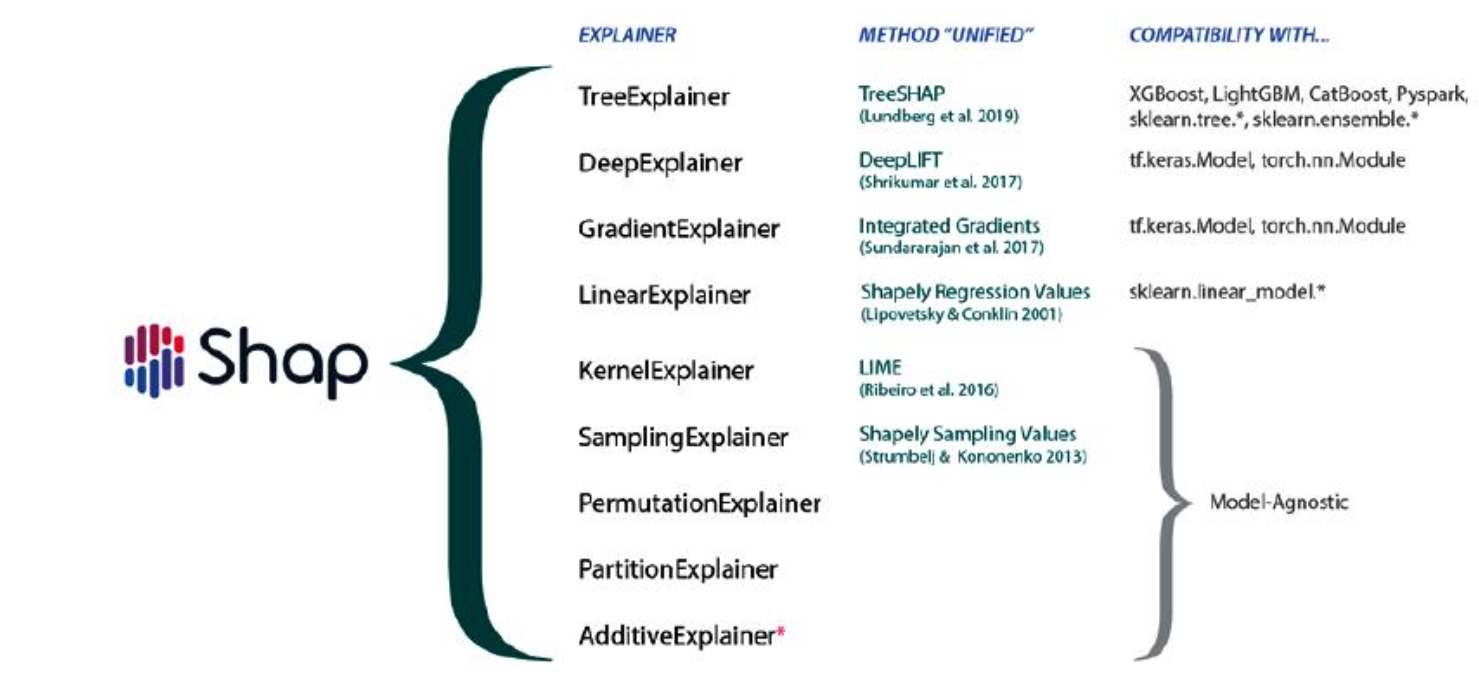

Nous allons maintenant présenter brièvement chacun des principaux explicateurs SHAP de la figure: 

* TreeExplainer a été spécialement conçu pour approximer efucacement les valeurs SHAP pour des modèles basés sur des arbres tels que des ensembles d'arbres comme XGBoost ou Random Forest ou CART Decision Trees . Parce qu'il utilise la fonction de valeur d'espérance conditionnelle au lieu de l'espérance marginale, il peut attribuer des valeurs différentes de zéro à des caractéristiques non influentes, violant ainsi la propriété factice de Shapley. Comme indiqué au chapitre 4, Principes fondamentaux de l'importance et de l'impact des caractéristiques, cela a des ramifications lorsque les caractéristiques sont colinéaires.


* DeepExplainer ne fonctionne qu'avec des modèles d'apprentissage en profondeur et la méthode unifiée était DeepLIFT. Cette méthode repose sur une prémisse simple, à savoir que l'importance d'une caractéristique peut être attribuée à la différence dans la sortie lorsqu'elle fournit une entrée ou une ligne de base "neutre" de référence. Cette entrée de base peut être n'importe quoi, mais elle signifie l'absence d'une caractéristique. Un itinéraire sûr et choisi par la bibliothèque SHAP consiste à utiliser la moyenne en fonction des caractéristiques de l'ensemble de données. Il dénit ensuite le multiplicateur pour chaque couche en tant qu'entrées sur sorties une fois que la ligne de base a été déduite $(y − y_{baseline} / x − x_{baseline} )$ lors de la rétropropagation. La règle de la chaîne est appliquée aux multiplicateurs comme elle le serait aux gradients. L'importance de la caractéristique pour une instance spécifique est la différence entre l'entrée et la ligne de base multipliée par la « pente » partielle produite lors de la rétropropagation pour les multiplicateurs. SHAP prend ensuite ces sorties et les adapte pour se conformer aux propriétés SHAP


* GradientExplainer a plusieurs méthodes unifiées sous un même parapluie, mais la principale est les Dégradés attendus, un dérivé de Dégradés intégrés et de SmoothGrad. Nous ne les expliquerons pas ici en détail car nous le ferons au chapitre 8, Visualiser les réseaux de neurones convolutifs. Comme nous l'apprendrons alors, comme DeepLIFT, Integrated Gradients utilise une ligne de base qui représente l'absence des fonctionnalités et s'intègre à partir de la ligne de base entre la sortie et l'entrée. La bibliothèque SHAP utilise un concept similaire appelé Dégradés attendus, qui reformule l'intégrale comme une attente. Il utilise ensuite l'ensemble de données d'arrière-plan comme valeurs de référence d'échantillonnage pour cette attente, conduisant à une attente combinée de gradients qui convergent en tant qu'attributions qui s'additionnent comme les valeurs SHAP sont censées le faire.

* LinearExplainer est un explicateur très basique inspiré uniquement par l'un des les premiers articles sur Shapley dans le contexte des modèles d'apprentissage supervisé. Elle est limitée aux seuls modèles linéaires scikit-learn. 

* KernelExplainer est la méthode agnostique de modèle la plus populaire, et elle est basée sur LIME, dont nous parlerons plus en détail au chapitre 6, Méthodes d'interprétation agnostique de modèle local. Il suit les mêmes étapes que LIME, telles que les modèles linéaires pondérés ajustés, mais il utilise des exemples de coalitions Shapley et un noyau différent, qui renvoie les valeurs SHAP comme coefficients. De plus, comme il remplace les caractéristiques absentes par des données aléatoires lors de la création de coalitions d'échantillons, il rencontre des problèmes avec la propriété factice et donc les caractéristiques colinéaires. Nous en discuterons également plus en détail au chapitre 6, Méthodes d'interprétation locales indépendantes du modèle.

* SamplingExpainer est uniquement basé sur le premier article qui a introduit une approche d'échantillonnage pour approximer les valeurs de Shapley et est également indépendant du modèle, mais il suppose l'indépendance des caractéristiques. C'est une assez bonne alternative à KernelExplainer lorsque vous disposez d'un vaste ensemble de données d'arrière-plan, qui serait nécessaire pour des données éparses, par exemple.

* PermutationExplainer est ce qui se rapproche le plus de l'approximation de la valeur de Shapley par force brute. Il fonctionne en permutant toutes les caractéristiques dans les directions avant et arrière. Si cela est fait une fois, il capture les valeurs SHAP pour les interactions jusqu'au second ordre, mais peut être exécuté plusieurs fois pour atteindre une fidélité encore plus élevée.

* PartitionExplainer calcule les valeurs SHAP sur un arbre qui définit une hiérarchie de fonctionnalités. Ceci est recommandé lorsque plusieurs de vos fonctionnalités appartiennent à un groupe ou à une catégorie ou ont des fonctionnalités fortement corrélées. 

* AdditiveExplainer accepte toute fonction de prédiction arbitraire, il est donc indépendant du modèle mais échouera si le modèle n'est pas un modèle additif généralisé (GAM) .


Dans ce chapitre, nous utiliserons GradientExplainer pour le modèle Keras et TreeExplainer pour le modèle XGBoost. Mais ce ne sont pas des explicateurs indépendants du modèle. Pourquoi les utiliserions-nous dans un chapitre intitulé Global Model-Agnostic Interpretation Methods ? Parce que SHAP dans son ensemble est indépendant du modèle, car tous les explicateurs peuvent couvrir collectivement n'importe quelle classe de modèle et cas d'utilisation, que ce soit pour des ensembles de données tabulaires, image ou texte. Plus important encore, ils peuvent être initialisés plus ou moins de la même manière et avoir un ensemble cohérent de tracés pouvant être utilisés pour l'interprétation. Nous allons apprendre à interpréter trois de ces graphiques dans ce chapitre. Et dans les chapitres suivants, nous emploierons KernelExplainer et DeepExplainer et nous étendrons à d'autres tracés SHAP.


Avant de passer à l'interprétation, nous devons d'abord effectuer deux étapes simples - celles-ci peuvent être délicates dans certains cas, nous allons donc les parcourir:


1. Initialisation des explicateurs : la première étape pour tout explicateur SHAP est de l'initialiser. TreeExplainer ne nécessite que le modèle basé sur l'arbre ajusté (fitted_xgb_model) :

In [ ]:
shap_xgb_explainer = shap.TreeExplainer(fitted_xgb_model)

D'autre part, GradientExplainer nécessite un ensemble de données d'arrière-plan. Nous pouvons soit prendre un échantillon, soit le résumer en utilisant shap.kmeans(data, K). Nous allons faire un échantillon de 150 en utilisant np.choice. Maintenant, print(background.shape) devrait confirmer que nous avons sélectionné 150 échantillons de l'ensemble de données de test et, naturellement, il a 81 fonctionnalités. Ensuite, pour initialiser l'explicateur, nous connectons notre modèle (fitted_nn_model) et les données de fond. Veuillez noter que nous convertissons le DataFrame pandas en un tableau NumPy de flotteurs pour qu'il fonctionne avec TensorFlow

In [ ]:
background = X_train.iloc[np.random.choice(X_train.shape[0], 150, replace=False)]
print(background.shape)
shap_nn_explainer = shap.GradientExplainer(fitted_nn_model,\
                                         background.astype(float).values)

(150, 82)


Une fois que nous avons initialisé les explicateurs SHAP, nous pouvons les utiliser pour calculer les valeurs SHAP.

2. Calcul des valeurs SHAP : tous les explicateurs ont une fonction shap_values, qui prend n'importe quel nombre d'observations tant qu'elles correspondent aux dimensions des entités et calculent les valeurs SHAP pour elles. Nous le ferons pour les ensembles de données d'entraînement et de test du modèle XGBoost. Comme indiqué dans le chapitre 4, Principes fondamentaux de l'importance et de l'impact des fonctionnalités, l'interprétation des performances d'un modèle par rapport aux données d'apprentissage et aux données de test peut avoir différents avantages. Et même si nous souhaitons comprendre ce que le modèle trouve dans des données inédites, comparer les deux pour s'assurer qu'ils sont presque entièrement cohérents constitue un bon test de cohérence :

In [ ]:
shap_xgb_values_train = shap_xgb_explainer.shap_values(X_train)
print(shap_xgb_values_train.shape)
shap_xgb_values_test = shap_xgb_explainer.shap_values(X_test)
print(shap_xgb_values_test.shape)

(30296, 82)
(6684, 82)


Le code précédent doit générer des tuples qui correspondent aux dimensions des ensembles de données d'entraînement ((29389, 81)) et de test ((6484, 81)). Il devrait y avoir une valeur SHAP pour chaque caractéristique pour chaque observation. Contrairement à d'autres méthodes d'interprétation de modèles, les valeurs dérivées par SHAP sont suffisamment granulaires pour être utilisées pour toutes sortes d'interprétations globales et locales, sans ajustement ou post-traitement ultérieur.

Maintenant, calculons les valeurs SHAP du réseau de neurones pour l'ensemble de données de test et affichons le type de l'objet renvoyé par shap_values. Notez qu'il s'agit d'une liste et non d'un tableau. En théorie, seuls les modèles à sorties multiples, tels que les classificateurs, produisent une liste, mais les modèles de réseaux de neurones de régression à sortie unique renvoient également une liste. Dans ce cas, les valeurs SHAP que vous recherchez sont le premier élément de la liste (shap_nn_values_test[0]) :

In [ ]:
shap_nn_values_test = shap_nn_explainer.shap_values(X_test.astype(float).values)
print(type(shap_nn_values_test))
print(shap_nn_values_test[0].shape)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


<class 'list'>
(6684, 82)


L'extrait précédent doit afficher les dimensions des valeurs SHAP pour le modèle de réseau neuronal et l'ensemble de données de test ((6484, 81)).

## Générer des tracés récapitulatifs SHAP. 

La première chose que vous pouvez faire avec les valeurs SHAP est de générer une instance summary_plot. Le premier paramètre est constitué des valeurs suivies des données utilisées pour les produire et, éventuellement, du type de tracé (plot_type). Nous allons tracer le tracé récapitulatif XGBoost pour l'entraînement et le test afin de pouvoir les comparer :

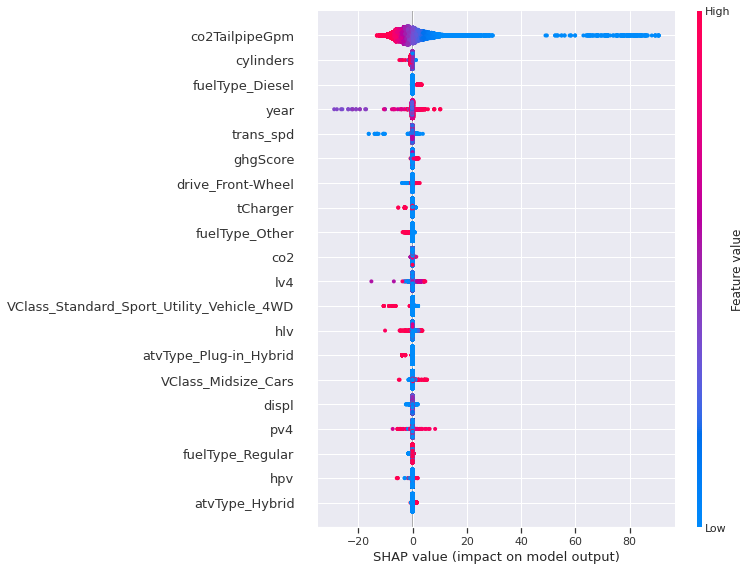

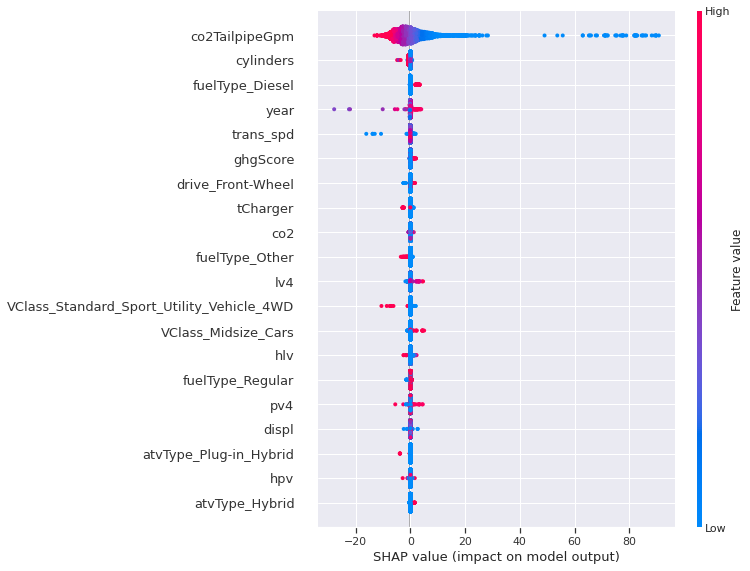

In [ ]:
shap.summary_plot(shap_xgb_values_train, X_train, plot_type="dot")
shap.summary_plot(shap_xgb_values_test, X_test, plot_type="dot")

Le code précédent a produit les tracés de la figure. Vous pouvez dire qu'ils sont très similaires et plus ou moins cohérents jusqu'à la neuvième caractéristique de haut en bas. Les caractéristiques sont classées par importance de haut en bas. Et une ligne divise l'impact de ces caractéristiques, séparant le négatif et le positif. Il y a des points des deux côtés pour toutes les caractéristiques, et la quantité de points indique dans quelle mesure une caractéristique impacte le modèle négativement (le gauche) ou positivement (à droite)


Nous pouvons dire que les points les plus à gauche appartiennent à l'année, ils sont donc les plus corrélés avec un MPG combiné inférieur. Cependant, ce sont également des valeurs aberrantes, car la plupart des points pour l'année sont concentrés autour de la zone médiane. Les points sont codés par couleur, vous pouvez donc les attribuer à des valeurs de caractéristiques élevées, moyennes ou faibles. Par exemple, nous pouvons dire que les valeurs aberrantes sont toutes des années de valeur moyenne. En d'autres termes, sur les 37 années s'étalant entre 1984 et 2021, celles du milieu sont 1996-2009. Ces années ont du sens car elles correspondent à certaines années avec le pétrole le moins cher et le boom de l'économie américaine se terminant par une crise financière et les prix du pétrole les plus élevés jamais enregistrés. Les gros véhicules utilitaires sport énergivores étaient courants à cette époque.


Ensuite, nous pouvons générer summary_plot pour les valeurs SHAP du réseau de neurones et les comparer à XGBoost

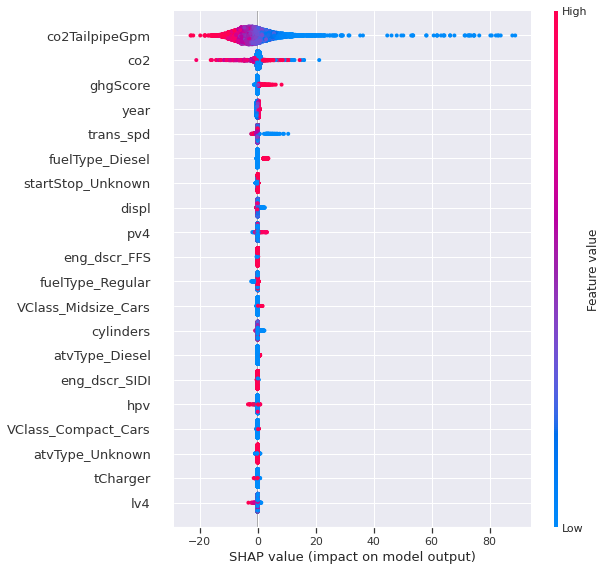

In [ ]:
shap.summary_plot(shap_nn_values_test[0], X_test, plot_type="dot")

Les sorties d'extrait précédentes. La première fonctionnalité, co2TailpipeGpm, est cohérente avec celle de XGBoost. Les valeurs élevées sont corrélées négativement et les valeurs faibles sont corrélées positivement, produisant un gradient presque parfait entre les deux extrêmes. La plupart des valeurs sont distribuées au milieu. En plus de cela, il ne devrait pas être surprenant qu'aucune des autres fonctionnalités ne corresponde au même ordre. L'année paire est non seulement moins importante que pour le modèle XGBoost, dans l'ensemble, mais aucune prévision ne semble être très négativement impactée par l'année


Les différences entre la figure 1 et la figure 2 peuvent être attribuées aux modèles qui apprennent différentes choses sur les variables prédictives pour prédire le résultat. C'est comme demander à deux étudiants qui sont allés dans la même classe d'expliquer la réponse à une question en fonction de ce qu'ils ont appris dans cette classe. En supposant qu'ils soient de bons élèves, leurs explications auront du sens pour relier la question à la réponse. Ils incluront bon nombre des mêmes éléments dans leur raisonnement, mais ils seront hiérarchisés et interconnectés différemment. Après tout, ces étudiants raisonnent différemment parce que ce sont des personnes différentes. Nous utilisons deux modèles dans cet exercice précisément parce qu'il vaut mieux apprendre de deux étudiants que d'un seul !

## Comprendre les interactions 

Les interactions de fonctionnalités dans les modèles de boîte noire sont une tâche compliquée, mais si vous creusez suffisamment, vous pouvez trouver des réponses sur comment et pourquoi elles interagissent. Étant donné que nous apprenons à partir de deux modèles d'apprentissage automatique, il est logique de tirer des enseignements des deux. Et il existe quelques milliers d'interactions bivariées possibles entre nos 81 caractéristiques. Cependant, la grande majorité de l'impact moyen sur la sortie du modèle réside dans la première caractéristique. Les quatre ou cinq autres principales caractéristiques sont loin derrière. Et si vous changez summary_plot en plot_type="bar", vous pouvez l'observer plus facilement. Il est très probable que nous trouvions les interactions les plus marquantes parmi ce premier niveau de fonctionnalités.


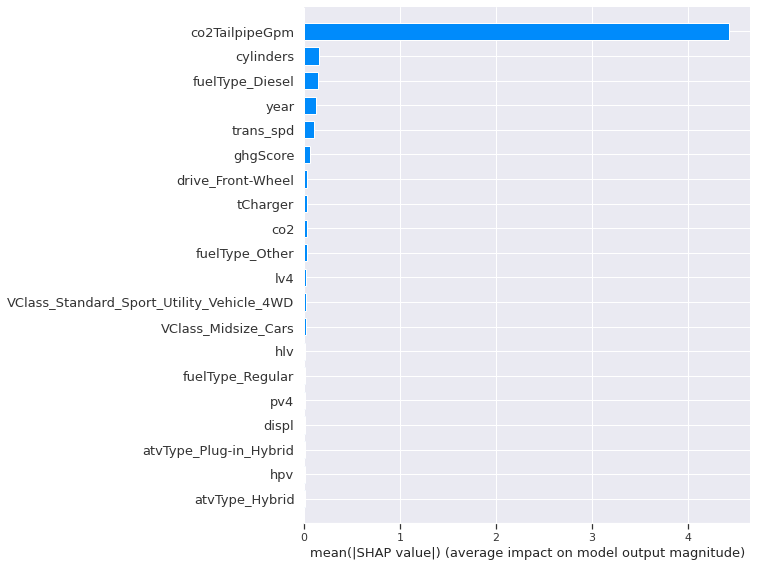

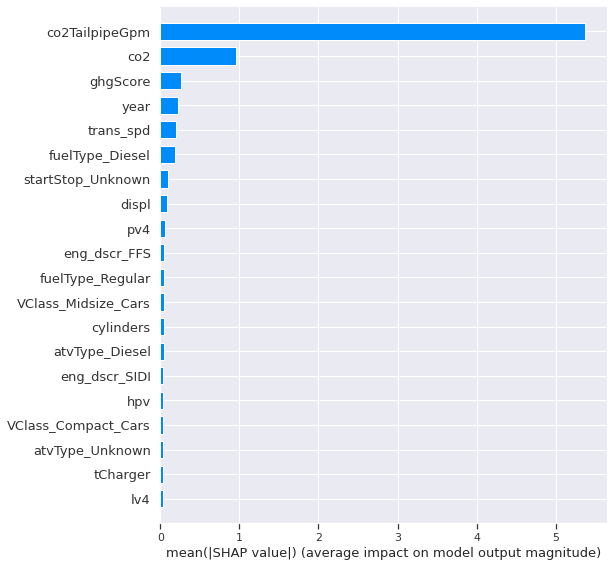

In [ ]:
shap.summary_plot(shap_xgb_values_test, X_test, plot_type="bar")
shap.summary_plot(shap_nn_values_test[0], X_test, plot_type="bar")

À cette fin, examinons les interactions entre les cinq principales fonctionnalités de XGBoost (co2TailpipeGpm, fuelType_Diesel, year, cylindres et ghgScore) et celle qui est la deuxième la plus importante pour le réseau de neurones (co2) mais la septième la plus importante pour XGBoost. Nous créons une liste (top_features_l) avec ces fonctionnalités et y ajoutons la variable de réponse comb08. Ensuite, nous sous-ensembleons la trame de données du train par ces fonctionnalités et l'enregistrons sous le nom top_df :

In [ ]:
top_features_l = ['comb08'] + ['co2TailpipeGpm', 'fuelType_Diesel',\
                               'co2', 'year', 'ghgScore', 'cylinders']
top_df = fueleconomy_df.loc[X_train.index, top_features_l]

Ensuite, nous pouvons visualiser les coefficients de corrélation de Spearman des caractéristiques représentées dans cette trame de données (top_df) avec une carte thermique. Cette méthode mesure la monotonie entre deux caractéristiques. Il génère un nombre compris entre -1 et 1, indiquant à la fois la force et la direction de la relation. Les valeurs les plus proches des deux extrêmes sont les plus fortes, négativement ou positivement, tandis que les valeurs les plus proches de zéro sont les moins fortes. Les coefficients de Spearman peuvent représenter des relations non linéaires tant qu'elles sont monotones. Bien que cette méthode soit un bon point de départ pour hiérarchiser les interactions à examiner plus avant, il faut savoir qu'une relation non linéaire qui n'est pas monotone ne sera pas considérée comme forte par cette méthode. Une courbe parabolique aura un coefficient de Spearman nul car elle est symétriquement non monotone bien qu'il y ait clairement une relation significative

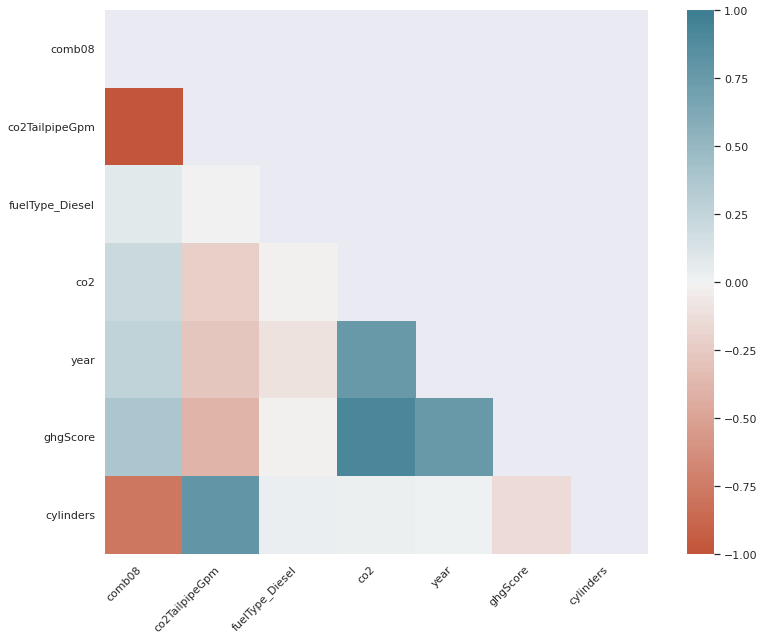

In [ ]:
corrs = stats.spearmanr(top_df).correlation
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(
    corrs, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    xticklabels=top_df.columns,
    yticklabels=top_df.columns,
    mask=mask,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

L'extrait précédent produit le tracé illustré à la figure . Vous pouvez dire que les cylindres et co2TailpipeGpm ont la plus grande corrélation monotone avec la variable de réponse (comb08) et qu'ils sont tous les deux négatifs. Le reste des caractéristiques a une corrélation monotone positive plus faible


À l'aide de spearmanr, nous pouvons également extraire les valeurs p du test d'hypothèse qui valide la corrélation. Pour être statistiquement rigoureux, vous pouvez utiliser point-biserial au lieu de fuelType_Diesel car il s'agit d'une caractéristique dichotomique. Le coefficient de corrélation point-bisérial est comme Spearman mais entre une variable dichotomique et une variable continue. Il ne suppose pas la monotonie, mais il fait d'autres hypothèses qui peuvent être testées. Nous n'entrerons pas dans les détails ici, mais c'est généralement un indicateur plus robuste pour ce type de relation :

In [ ]:
print('spearman\tco2TailpipeGpm→comb08\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(X_train.co2TailpipeGpm.values, top_df.comb08.values)))
print('point-biserial\tfuelType_Diesel→comb08\tcorr: %.3f\tp-val: %.4f' % 
      (stats.pointbiserialr(top_df.fuelType_Diesel.values, top_df.comb08.values)))
print('spearman\tco2→comb08\t\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(X_train.co2.values, top_df.comb08.values)))
print('spearman\tyear→comb08\t\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(X_train.year.values, top_df.comb08.values)))
print('spearman\tghgScore→comb08\t\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(top_df.ghgScore.values, top_df.comb08.values)))
print('spearman\tcylinders→comb08\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(X_train.cylinders.values, top_df.comb08.values)))

spearman	co2TailpipeGpm→comb08	corr: -0.993	p-val: 0.0000
point-biserial	fuelType_Diesel→comb08	corr: 0.052	p-val: 0.0000
spearman	co2→comb08		corr: 0.217	p-val: 0.0000
spearman	year→comb08		corr: 0.261	p-val: 0.0000
spearman	ghgScore→comb08		corr: 0.388	p-val: 0.0000
spearman	cylinders→comb08	corr: -0.786	p-val: 0.0000


Le code précédent génère ce qui suit. Les valeurs p inférieures à 0,05 valident l'hypothèse de corrélation pour tous


La carte thermique de Spearman nous a aidés à nous orienter dans quelques directions intéressantes : 

* Selon les valeurs SHAP de XGBoost, les cylindres ne sont que la quatrième caractéristique la plus importante, mais il semble être fortement corrélé de manière monotone avec la variable cible et co2TailpipeGpm, et dans une moindre mesure avec ghgScore.

* Selon les valeurs SHAP du réseau de neurones, la fonction co2 n'est que dans les cinq premiers, mais elle a un Spearman plus élevé que fuelType_Diesel. Pourquoi ?

* Le réseau de neurones semblait également valoriser davantage ghgScore, et dans la carte thermique de corrélation, il a des valeurs élevées pour le co2 et l'année. Il semble qu'il se passe quelque chose entre ces trois caractéristiques




Un excellent moyen d'examiner ces interactions de caractéristiques consiste à utiliser les diagrammes de dépendance SHAP tout en mesurant les corrélations avec scipy. Nous tracerons également des nuages ​​de points pour comparer nos résultats avec les données sous-jacentes

## Tracés de dépendance SHAP

Un tracé de dépendance SHAP se situe entre la valeur SHAP d'une entité sur l'axe des y et les valeurs de l'entité sur l'axe des x. Essentiellement, il montre comment sur les valeurs représentées sur l'axe des x, l'impact sur le résultat change sur l'axe des y


Une seule fonction (dependence_plot) tracera le tracé de dépendance. Cela nécessite juste le nom (co2TailpipeGpm) ou l'index de la fonctionnalité, suivi des valeurs SHAP (shap_xgb_values_test) et de leurs données correspondantes (X_test). Vous pouvez éventuellement spécifier un terme d'interaction (interaction_index). Nous n'affichons pas l'intrigue immédiatement (show=False) car nous voulons l'agrandir (fig.set_size_inches(12,8)) puis utiliser plt.show() pour l'afficher. Nous rendons également les points translucides (alpha=0,3) afin que les zones avec moins de points soient plus faciles à identifier. Après cela, nous pouvons imprimer Spearman pour l'interaction comme nous l'avons fait auparavant, puis tracer un autre graphique de dépendance, mais cette fois pour les cylindres avec ghgScore. Veuillez noter que les cylindres sont une caractéristique ordinale, donc x_jitter=0.4 aide à mieux apprécier la distribution car, par exemple, sans gigue, tous les véhicules à six cylindres avec une valeur SHAP de zéro apparaîtraient comme un seul point :

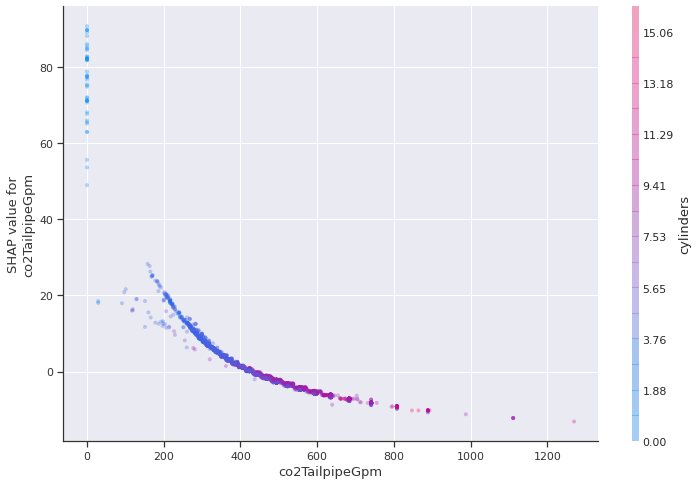

spearman	cylinders→co2TailpipeGpm	corr: 0.790	p-val: 0.0000


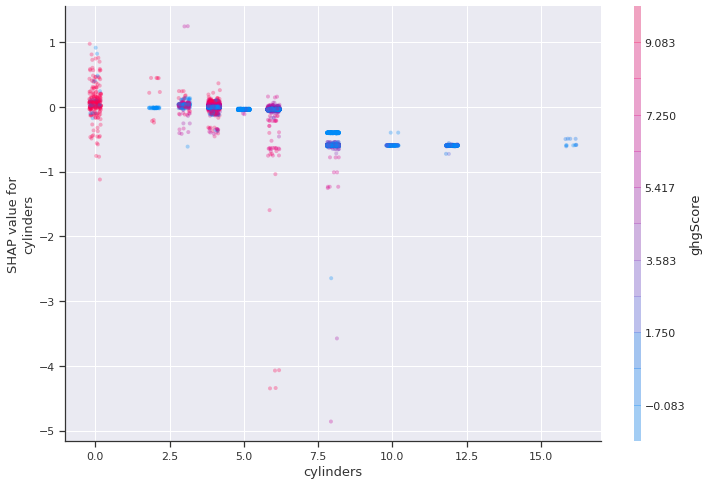

spearman	ghgScore→cylinders		corr: -0.141	p-val: 0.0000


In [ ]:
shap.dependence_plot("co2TailpipeGpm", shap_xgb_values_test, X_test,\
                     interaction_index="cylinders", show=False, alpha=0.3)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()
print('spearman\tcylinders→co2TailpipeGpm\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(X_train.cylinders.values, X_train.co2TailpipeGpm.values)))
shap.dependence_plot("cylinders", shap_xgb_values_train, X_train,\
                     interaction_index="ghgScore", show=False,\
                     x_jitter=0.4, alpha=0.3)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()
print('spearman\tghgScore→cylinders\t\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(top_df.ghgScore.values, top_df.cylinders.values)))

Le code précédent génère la sortie de la Figure 1 et de la Figure 2. Le code couleur sur la droite se rapporte aux valeurs du terme d'interaction. Le premier graphique nous indique qu'une augmentation de cylindres est en corrélation avec une augmentation de co2TailpipeGpm et, à son tour, des valeurs plus élevées de co2TailpipeGpm sont en corrélation avec des valeurs SHAP plus faibles. Spearman confirme la nature monotone de cette interaction. Le deuxième graphique est plus difficile à interpréter, mais il montre qu'un ghgScore plus élevé est en corrélation avec moins de cylindres et des valeurs SHAP légèrement plus élevées.


Notez qu'il existe des valeurs aberrantes dans la figure 2 où les valeurs SHAP sont très faibles ou très élevées lorsque ghgScore est élevé. Ces valeurs aberrantes sont localisées lorsque les cylindres ont des valeurs spécifiques. Par exemple, le modèle peut avoir appris que lorsque les cylindres sont à zéro et que ghgScore est supérieur à cinq, l'impact sur le résultat devrait être plus élevé


Les graphiques de SHAP sont une représentation visuelle de ce que le modèle a appris de nos données. Cependant, si nous avons le moindre doute, nous pouvons toujours aller directement à la source : les données. Dans le chapitre 4, Principes fondamentaux de l'importance et de l'impact des caractéristiques, nous avons généré côte à côte des graphiques ICE et des nuages ​​de points. Dans cet exemple, nous pourrions dire que le modèle "reliait les points" dans le nuage de points en représentant visuellement ce qu'il a appris avec les graphiques ICE

Nous pouvons faire la même chose maintenant en étalant les cylindres sur co2TailpipeGpm et la cible comb08. Ces intrigues peuvent nous dire quelque chose que le modèle ne nous dit pas ou confirmer son histoire. Le code suivant crée deux sous-parcelles avec des nuages ​​de points regplot. Le regplot de Seaborn est destiné à tracer des données avec une ligne de régression linéaire. Même si nous ne nous attendons pas à une linéarité, il est souvent utile de tracer la ligne pour montrer une direction ou une tendance

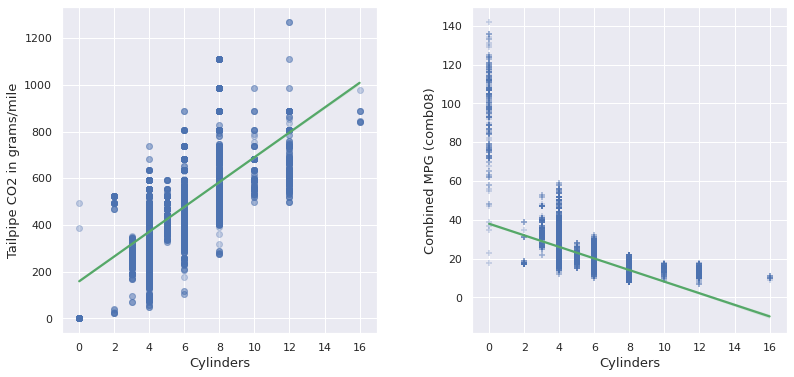

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (13,6))
fig.subplots_adjust(hspace=0, wspace=0.3)
sns.regplot(x=X_train.cylinders, y=X_train.co2TailpipeGpm, ax=axs[0],\
            scatter_kws={'alpha':0.3}, line_kws={'color':'g'})
axs[0].set_ylabel('Tailpipe CO2 in grams/mile', fontsize=13)
axs[0].set_xlabel('Cylinders', fontsize=13)
axs[0].set_xlim([-1,17])

sns.regplot(x=X_train.cylinders, y=y_train, ax=axs[1], marker="+",\
            scatter_kws={'alpha':0.3}, line_kws={'color':'g'})
axs[1].set_ylabel('Combined MPG (comb08)', fontsize=13)
axs[1].set_xlabel('Cylinders', fontsize=13)
axs[1].set_xlim([-1,17])
plt.show() 

Traçons maintenant la dépendance_plot pour co2TailpipeGpm interagissant avec le co2 comme nous l'avons fait pour les cylindres

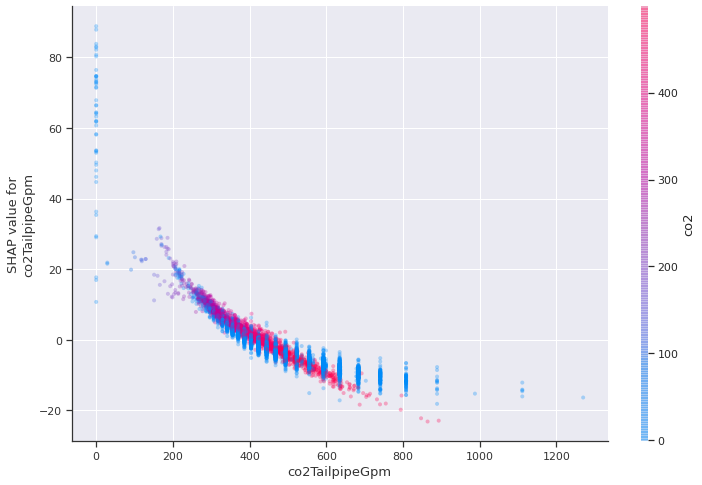

spearman	co2→co2TailpipeGpm	corr: -0.221	p-val: 0.0000


In [ ]:
shap.dependence_plot("co2TailpipeGpm", shap_nn_values_test[0],\
                     X_test, alpha=0.3,\
                     interaction_index="co2", show=False)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()
print('spearman\tco2→co2TailpipeGpm\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(X_train.co2.values, X_train.co2TailpipeGpm.values)))

Les sorties de code précédentes de la figure montrent comment les valeurs moyennes à élevées de co2 ont une relation monotone positive avec co2TailpipeGpm mais, étrangement, les faibles valeurs de co2 n'ont aucun lien. Ils sont partout ! Le coefficient de Spearman indique une corrélation monotone négative à cause de ceci


Encore une fois, tracer les données avec regplot peut faire la lumière sur ce qui se passe avec les interactions. Nous allons tracer co2 contre co2TailpipeGpm et comb08

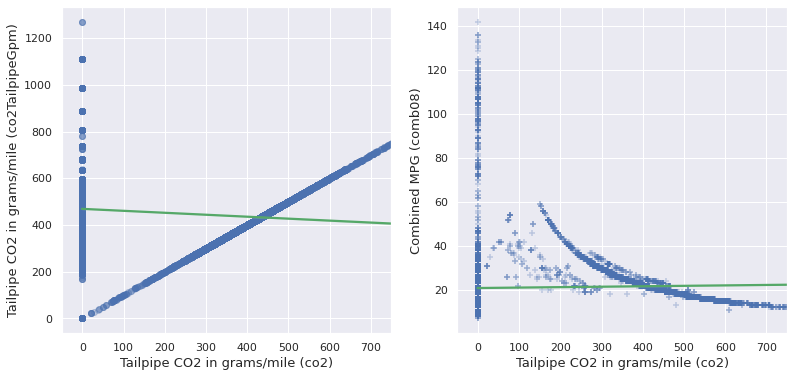

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (13,6))
sns.regplot(x=X_train.co2, y=X_train.co2TailpipeGpm, ax=axs[0],\
            scatter_kws={'alpha':0.3}, line_kws={'color':'g'})
axs[0].set_ylabel('Tailpipe CO2 in grams/mile (co2TailpipeGpm)',\
                  fontsize=13)
axs[0].set_xlabel('Tailpipe CO2 in grams/mile (co2)', fontsize=13)
axs[0].set_xlim([-50, 750])
sns.regplot(x=X_train.co2, y=y_train, ax=axs[1], marker="+",\
            scatter_kws={'alpha':0.3}, line_kws={'color':'g'})
axs[1].set_ylabel('Combined MPG (comb08)', fontsize=13)
axs[1].set_xlabel('Tailpipe CO2 in grams/mile (co2)', fontsize=13)
axs[1].set_xlim([-50, 750])
plt.show() 

Les sorties d'extrait précédentes. Il montre comment, pour la plupart, co2 et co2TailpipeGpm sont égaux, sauf lorsque co2=-1. Si vous voulez le confirmer, exécutez une cellule avec X_train[X_train.co2TailpipeGpm != X_train.co2].co2, qui produira une série de pandas de co2 lorsqu'ils ne sont pas égaux. Si vous creusez plus profondément, vous vous rendrez compte que tous les -1 correspondent à des années antérieures à 2013. Cela ne devrait pas être surprenant compte tenu de ce qui est écrit dans le dictionnaire de données ! En effet, co2 est co2TailpipeGpm mais avec des informations manquantes. Cela ne devrait pas être pertinent, mais le réseau de neurones semble l'avoir trouvé important car il est fortement corrélé avec la cible, c'est-à-dire lorsqu'il est disponible. En d'autres termes, imaginez ce qui arriverait à la droite de régression dans les deux graphiques de la figure si vous supprimiez les -1

Mais si co2 est co2TailpipeGpm mais avec des valeurs manquantes, le réseau de neurones n'aurait-il pas dû le considérer comme non pertinent ?

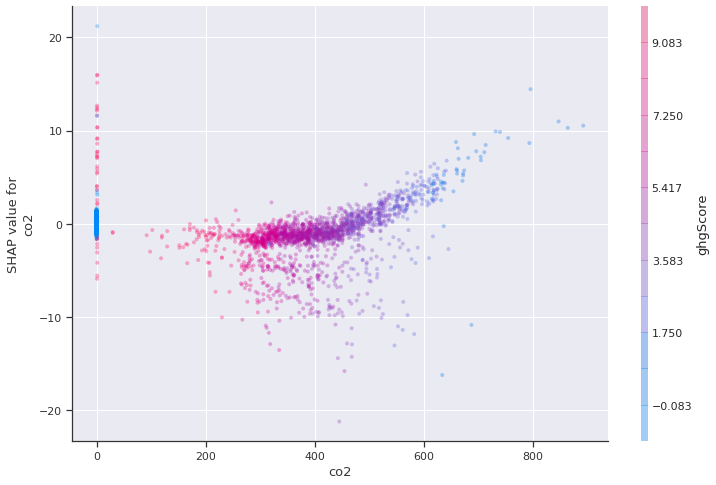

spearman	ghgScore→co2	corr: 0.929	p-val: 0.0000


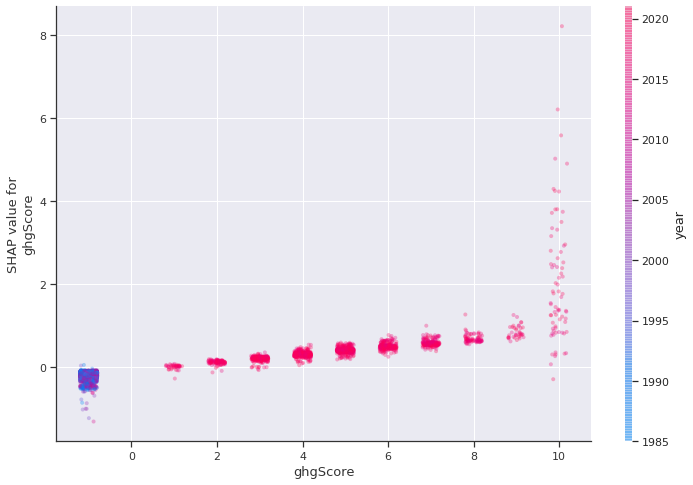

spearman	ghgScore→year	corr: 0.762	p-val: 0.0000


In [ ]:
shap.dependence_plot("co2", shap_nn_values_test[0],\
                     X_test, alpha=0.3, x_jitter=10,\
                     interaction_index="ghgScore", show=False)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()
print('spearman\tghgScore→co2\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(top_df.ghgScore.values, top_df.co2.values)))
shap.dependence_plot("ghgScore", shap_nn_values_test[0],\
                     X_test, alpha=0.3, x_jitter=0.4,\
                     interaction_index="year", show=False)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()
print('spearman\tghgScore→year\tcorr: %.3f\tp-val: %.4f' % 
      (stats.spearmanr(top_df.ghgScore.values, top_df.year.values)))

Les sorties d'extrait précédentes Figure 1 et Figure 2. Dans le premier graphique, vous pouvez dire qu'à mesure que le co2 augmente, le ghgScore a tendance à diminuer et la valeur SHAP augmente. Comme pour les cylindres, il existe des valeurs aberrantes, donc co2 devient pertinent en tant que caractéristique d'interaction lorsque co2=-1

D'un autre côté, la figure 2 montre que toutes les valeurs faibles à moyennes pour l'année ont une valeur ghgScore de -1. Cette fonctionnalité semble être truffée de valeurs « non disponibles », comme le co2. En plus de cela, à mesure qu'elle augmente, la valeur SHAP diminue légèrement, mais sa variance aussi, considérablement



Nous pouvons tracer ghgScore par rapport à la caractéristique la plus importante (co2TailpipeGpm) et à la cible pour mieux comprendre ce qui se passe

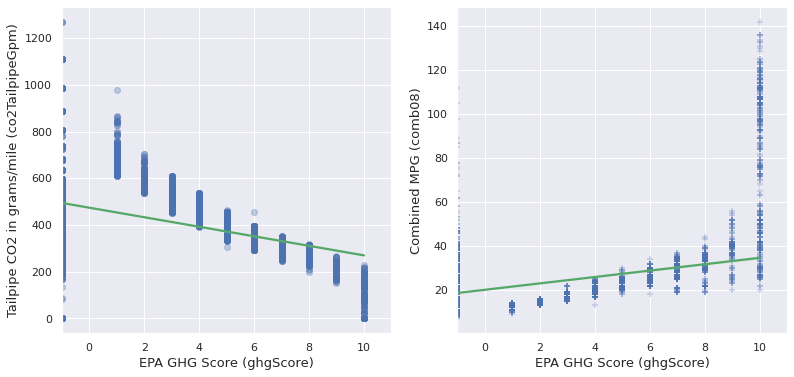

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (13,6))
sns.regplot(x=X_train.ghgScore, y=X_train.co2TailpipeGpm, ax=axs[0],\
            scatter_kws={'alpha':0.3}, line_kws={'color':'g'})
axs[0].set_ylabel('Tailpipe CO2 in grams/mile (co2TailpipeGpm)',\
                  fontsize=13)
axs[0].set_xlabel('EPA GHG Score (ghgScore)', fontsize=13)
axs[0].set_xlim([-1, 11])
sns.regplot(x=X_train.ghgScore, y=y_train, ax=axs[1], marker="+",\
            scatter_kws={'alpha':0.3}, line_kws={'color':'g'})
axs[1].set_ylabel('Combined MPG (comb08)', fontsize=13)
axs[1].set_xlabel('EPA GHG Score (ghgScore)', fontsize=13)
axs[1].set_xlim([-1, 11])
plt.show() 


Le code précédent génère la paire de tracés de la figure, qui montre comment ghgScore s'aligne si parfaitement avec co2TailpipeGpm, sauf lorsqu'il est de -1. Ce score est probablement une formule dérivée des émissions d'échappement, sauf avant 2013 où il n'était pas disponible - et cela se traduit par une certaine corrélation visible avec la cible. Cependant, le seul objectif de ghgScore dans le modèle est d'être une fonction d'interaction

Ensuite, nous étudierons un autre graphique qui peut être utile pour examiner les effets d'interaction entre les entités.

## Diagrammes de force SHAP 

Dans le prochain chapitre, le chapitre 6, Méthodes d'interprétation agnostiques du modèle local, nous examinerons cela plus en détail, mais pour l'instant, il suffit de savoir que les diagrammes de force sont généralement utilisés pour expliquer une seule prédiction. Les tracés de force représentent un continuum, où les caractéristiques bleues représentent les forces poussant les prédictions dans une direction négative et les rouges représentent les forces poussant les prédictions dans une direction positive. Dans ce cas, les forces positives représentent un MPG combiné plus élevé (comb08) et des forces négatives plus faibles.


Si nous empilons les interprétations locales côte à côte, nous pouvons utiliser ce concept pour une interprétation globale. Le tracé de force de SHAP fait précisément cela lorsque vous fournissez plusieurs valeurs et observations SHAP à force_plot. Il est plus lent de rendre ce tracé, car il s'agit de plusieurs tracés mais d'un tableau de bord dynamique. Une chose que vous pouvez faire pour le générer plus rapidement est d'utiliser votre échantillon de jeu de données de test. Nous ne sélectionnerons que 5 % (sample_test_size) des index (sample_test_idx) dans l'ensemble de données de test. Et comme il s'agit d'un tableau de bord dynamique, vous devrez initialiser le JavaScript avec la commande shap.initjs() avant d'exécuter force_plot. Le tracé de la force nécessite attendue_valeur, qui, dans ce cas, est la moyenne de la variable cible suivie des valeurs SHAP et des données de test

In [ ]:
sample_test_size = 0.05
sample_test_idx = np.random.choice(X_test.shape[0],
                                   math.ceil(X_test.shape[0]*sample_test_size),\
                                   replace=False)
shap.initjs()
shap.force_plot(shap_xgb_explainer.expected_value,\
                shap_xgb_values_test[sample_test_idx],\
                X_test.iloc[sample_test_idx])

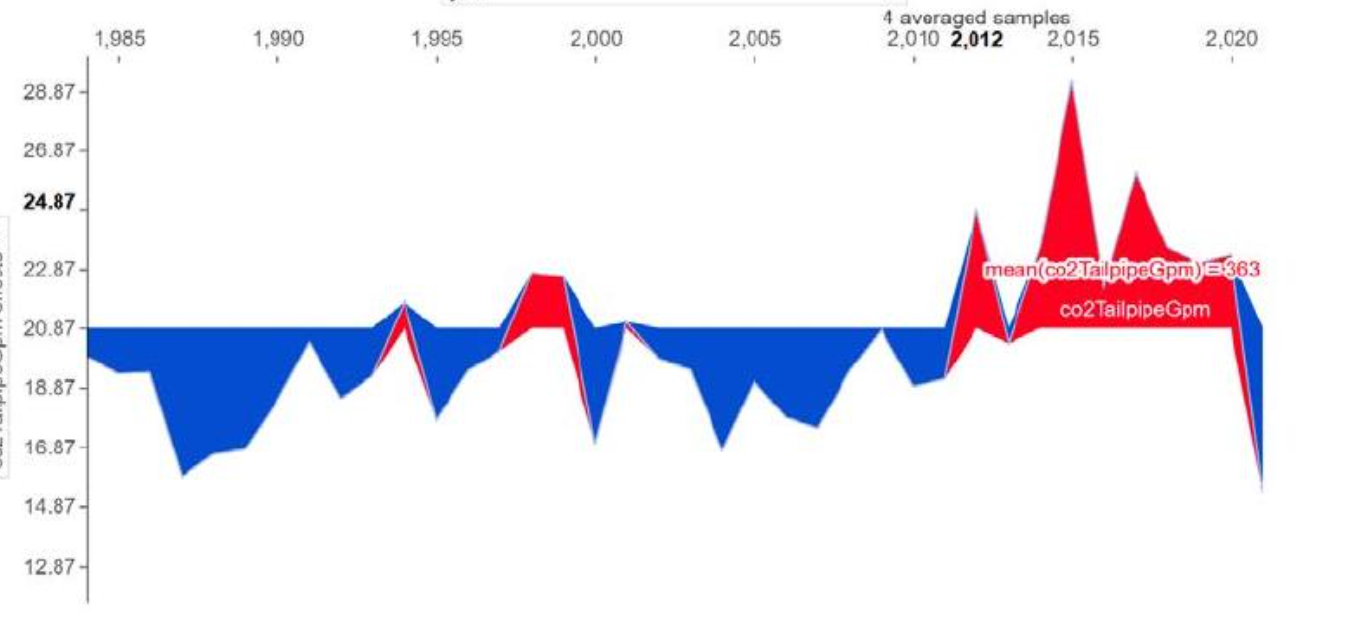

L'extrait précédent génère un tableau de bord. L'écran initial regroupe toutes les observations regroupées par similarité et centrées sur la valeur attendue (environ 21 MPG). Les forces bleues poussent le MPG vers le bas et les forces rouges vers le haut. Les forces, bien sûr, sont des valeurs de caractéristiques spécifiques. Et si vous survolez le graphique, il vous dira de quoi il s'agit. Dans la figure, vous pouvez le voir dans la première capture d'écran. Cependant, cet écran initial est souvent trop chargé pour être utile, vous voudrez donc filtrer et trier les effets moyens par fonctionnalité (avec la liste déroulante du haut) et peut-être voir comment ils interagissent avec d'autres fonctionnalités (avec la liste déroulante). La deuxième capture d'écran de la figure 2 montre comment après 2013, les effets moyens sur co2TailpipeGpm ont tendance à être plus élevés. Il y a eu aussi deux années où il y a eu des augmentations, qui étaient 2001 et 2012


Aussi beaux que soient les graphiques de dépendance SHAP et les visualisations d'interaction, ils peuvent être plus difficiles à interpréter que d'autres graphiques moins détaillés. Et parfois, tout ce que vous voulez faire est de capturer l'essence de quelque chose en montrant la direction générale de la façon dont une ou deux fonctionnalités interagissent avec la cible. C'est là que nous pouvons utiliser les tracés ALE

## Tracés d'effets locaux accumulés (ALE) 

Les tracés d'ALE sont comme les PDP que nous avons étudiés au chapitre 4, Principes fondamentaux de l'importance et de l'impact des caractéristiques, sauf qu'ils sont impartiaux et beaucoup plus rapides. Par impartial, nous entendons qu'ils n'ont pas d'hypothèse qui est rarement vraie : les caractéristiques ne sont pas corrélées. Comme nous l'avons déjà remarqué, co2 et ghgScore sont dérivés de co2TailPipeGpm. Par conséquent, ils sont pour la plupart redondants – sauf lorsqu'ils sont à -1 ("Non disponible"). Alors, comment peut-on s'appuyer sur une méthode d'interprétation qui confond leurs effets ?

Grâce à ses propriétés, il y a beaucoup de cohérence dans les attributions de SHAP car il fait des simulations basées sur des attentes raisonnables – même en tenant compte, pour la plupart, des caractéristiques colinéaires. Les PDP font des moyennes de prédictions sur toutes les valeurs de caractéristiques (et interpolations) indépendamment du fait qu'elles aient un sens tout en supposant l'indépendance des caractéristiques.

D'un autre côté, les tracés ALE adoptent une approche raisonnable en factorisant les distributions de données lors du calcul des effets d'une caractéristique. Ils le font en divisant la caractéristique en intervalles de taille égale (généralement, des quantiles). Ensuite, ils calculent de combien les prédictions changent, en moyenne, dans chacun de ces intervalles – donc local. Ils additionnent ces effets sur tous les intervalles – en d'autres termes, ils s'accumulent. Les effets sont relatifs à une moyenne, ils sont donc centrés sur zéro. Leur simplicité obscurcit leur génie. Les moyennes des différences d'intervalle sont des dérivées et l'accumulation est une intégrale cachée à la vue. Nous n'entrerons pas ici dans les détails mathématiques, mais cela conduit à isoler l'eet d'une caractéristique des autres !


Au moment de la rédaction, le package que nous utiliserons pour produire des tracés ALE (https://github.com/blent-ai/ALEPython) nécessite des données au format pandas. Cette exigence la rend incompatible avec le modèle de réseau de neurones. Nous utiliserons de toute façon le modèle XGBoost. Mais si vous vouliez utiliser le modèle de réseau neuronal, vous pourriez surmonter ce problème en créant une classe wrapper qui fait abstraction du modèle et convertit les pandas DataFrame en NumPy pour celui-ci. De nombreuses bibliothèques d'interprétation indépendantes du modèle ont du mal à les rendre compatibles avec chaque classe de modèle, vous devez donc recourir à des astuces pour les rendre « t ». Et il y a un manque de standardisation, dont nous discuterons au chapitre 14, Quelle est la prochaine étape pour l'interprétabilité de l'apprentissage automatique ?, qui empêche une mise en œuvre plus facile et une adoption généralisée.


Nous allons maintenant utiliser une boucle for pour les entités continues supérieures et tracer les tracés ALE pour chacune. La fonction ale_plot est très simple. Le premier argument est le modèle (fitted_xgb_model). Vient ensuite le DataFrame des pandas (X_test), suivi d'un tableau des caractéristiques à tracer. En option, vous pouvez définir des groupes, c'est-à-dire le nombre de quartiles à utiliser comme intervalles. Il existe également une autre option recommandée mais qui ralentit le processus, qui consiste à utiliser des échantillons de Monte Carlo (monte_carlo). Si vous définissez ceci sur true, il créera de nombreuses simulations de réplique (monte_carlo_rep), où il prendra une proportion d'échantillons tirés au hasard à partir des données et calculera ALE sur eux (monte_carlo_ratio). Vous vous retrouvez avec de fines lignes bleues représentant chaque réplique. L'idée derrière cela est de voir de combien votre tracé ALE pourrait varier dans un ensemble de données de validation tiré d'une distribution similaire à l'ensemble de données de test :

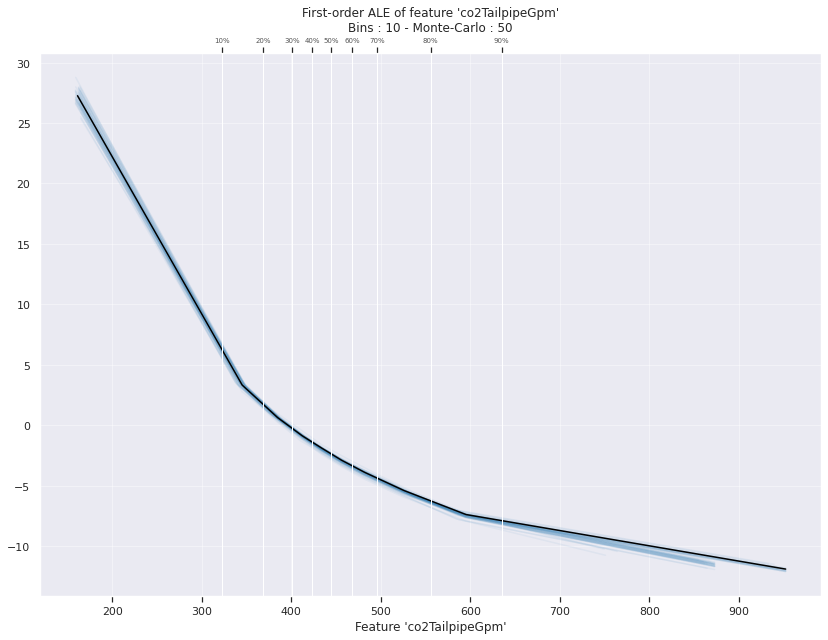

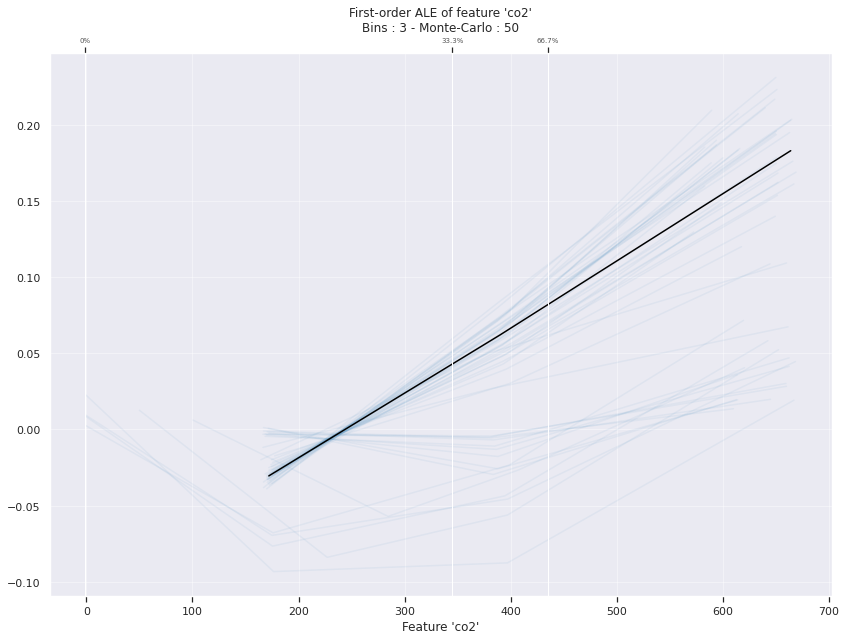

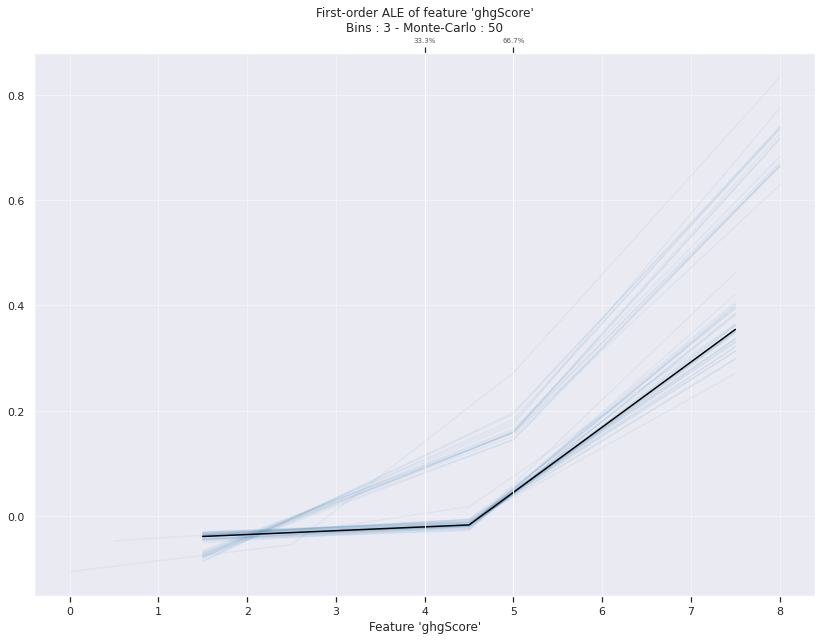

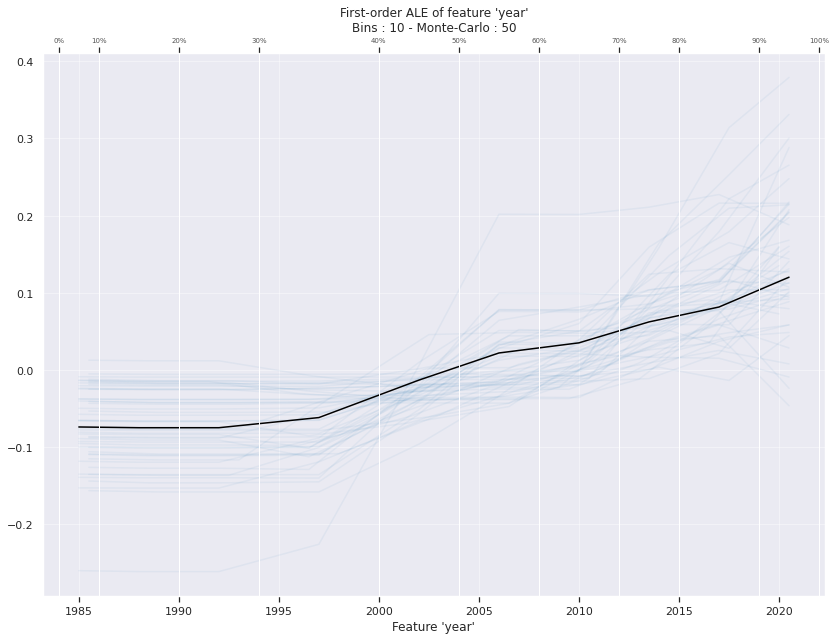

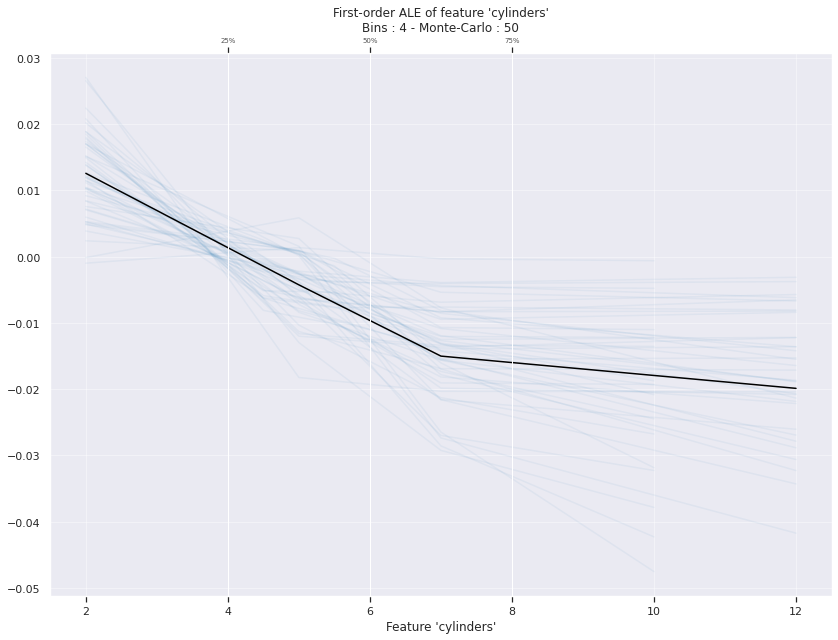

In [ ]:
for feature_name in ['co2TailpipeGpm', 'co2', 'ghgScore',\
                     'year', 'cylinders']:
    plt.rc("figure", figsize=(14, 10))
    ale_plot(
        fitted_xgb_model, X_test, [feature_name], bins=10,\
        monte_carlo=True, monte_carlo_rep=50,\
        monte_carlo_ratio=0.4
    )
    plt.show()

L'extrait précédent génère cinq tracés ALE. La figure 1 en fait partie. Il représente l'impact du co2 sur le modèle XGBoost selon l'ensemble de données de test. Complètement isolé, il a un impact infime allant de -0,05 à 0,30 MPG. Veuillez noter que la valeur pour -1 n'est même pas représentée dans le graphique car ALE reconnaît que, à lui seul, il ne porte aucune information


Ensuite, nous allons générer des tracés ALE pour deux entités à la fois. Cela est calculé de la même manière, sauf que les quantiles fonctionnent en deux dimensions, et il accumule les effets dans ces deux dimensions, résultant en un tracé de contour codé par couleur. Nous allons réitérer, mais cette fois contre des paires de fonctionnalités. ale_plot peut prendre deux caractéristiques dans le troisième argument, mais les simulations Monte Carlo ne sont pas disponibles pour deux

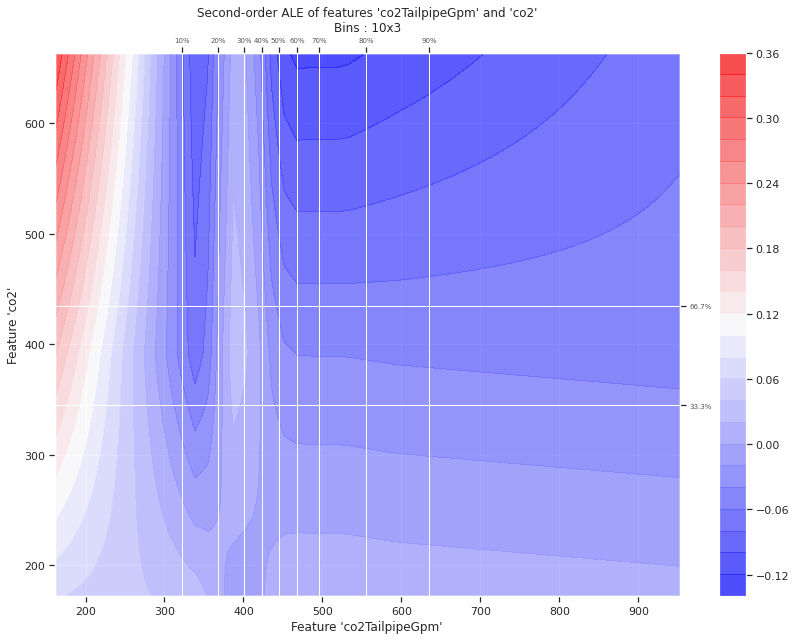

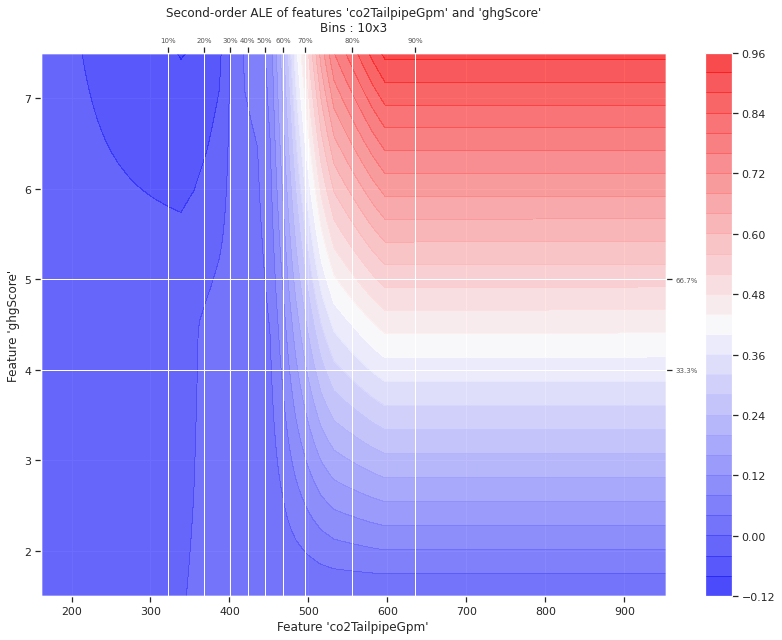

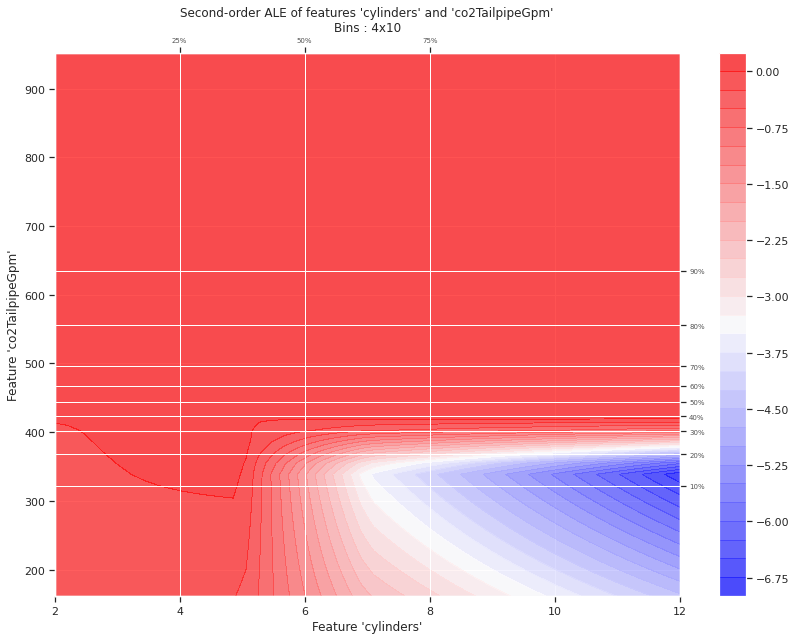

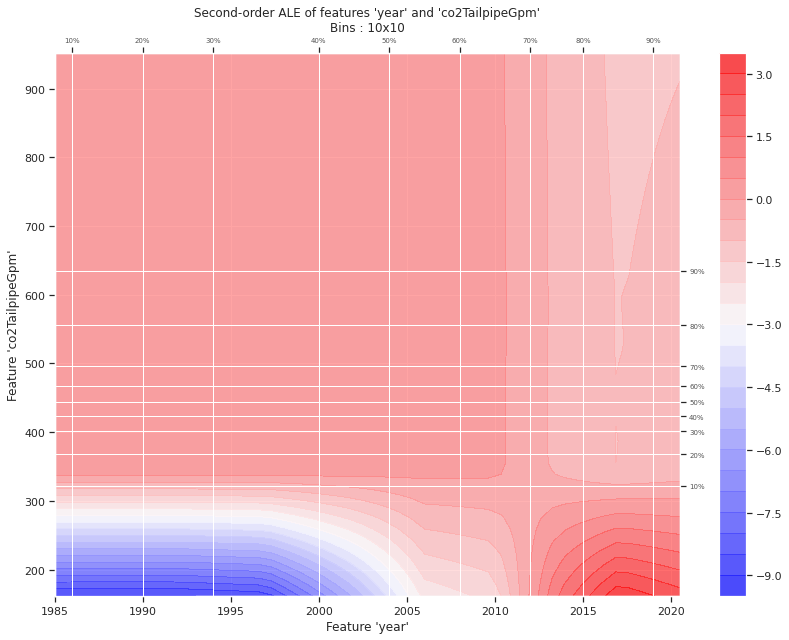

In [ ]:
for interaction in [['co2TailpipeGpm', 'co2'], ['co2TailpipeGpm', 'ghgScore'],\
                    ['cylinders', 'co2TailpipeGpm'], ['year', 'co2TailpipeGpm']]:
    plt.rc("figure", figsize=(14, 10))
    ale_plot(
        fitted_xgb_model, X_test, interaction, bins=[10,10]
    )
    plt.show()

Le code précédent génère quatre graphiques d'interaction ALE. Les trois premiers montrent des effets d'interaction négligeables (inférieurs à 1 MPG). Le dernier est illustré à la figure. Il montre un effet d'interaction important entre l'année et le co2TailpipeGpm, en particulier négativement pour les années entre 1985 et 2004, combiné avec un CO2 du tuyau d'échappement (co2TailpipeGpm) inférieur à 300. Mais attendez, le CO2 du tuyau d'échappement inférieur n'indique pas un MPG plus élevé


Il s'avère que le modèle a appris qu'il ne doit pas faire confiance à co2TailpipeGpm pour ces années et a tendance à pénaliser les valeurs les plus basses. Il est probable qu'il y ait des problèmes de qualité des données ou que la façon dont co2TailpipeGpm a été calculée a changé au fil des ans, ce qui la rend inégale.


Que se passe-t-il si vous souhaitez distiller des informations sur votre modèle d'apprentissage automatique qui sont trop diciles à interpréter par d'autres moyens, comme, par exemple, certaines règles qui expliquent la logique de prise de décision sous-jacente ? Ou des coecients qui capturent l'amplitude et la direction d'une caractéristique pour le modèle ? Les modèles intrinsèquement interprétables intègrent ces éléments, mais nous préférons les modèles boîte noire car ils fonctionnent mieux. Il y a un compromis, et c'est d'utiliser des modèles de substitution globaux, que nous verrons ensuite !


## Global Surrogates

Le modèle de substitution est un terme surchargé. Il est utilisé dans l'ingénierie, les statistiques, l'économie et la physique, pour n'en nommer que quelques-uns, souvent dans le contexte de métamodèles, d'optimisations mathématiques ou de simulations. Dans le contexte des méthodes d'interprétation de l'apprentissage automatique, le modèle de substitution global fait généralement référence à un blanc. -box model que vous entraînez avec les prédictions des modèles black-box. 


Nous procédons ainsi pour extraire des informations des paramètres intrinsèques du modèle boîte blanche, un peu comme nous l'avons fait au chapitre 3, Défis d'interprétation. Il existe également une autre façon d'utiliser des modèles de substitution : utiliser un modèle boîte noire pour approximer et évaluer un autre modèle auquel vous n'avez pas accès, mais dont vous avez les prédictions. 

C'est exactement ce que nous ferons au chapitre 7, Explications d'ancrage et contrefactuelles, mais nous préférons le terme modèle de proxy pour ce type de substitut. Vous n'avez besoin d'aucune bibliothèque sophistiquée pour créer un substitut global. Vous pouvez utiliser n'importe lequel des modèles de boîte blanche dont nous avons parlé au chapitre 3, Défis d'interprétation. Cela dit, certains modèles ont été conçus pour être utilisés comme substituts, tels que TREPAN. La bibliothèque Skater a une implémentation (https://oracle.github.io/Skater/reference/interpretation.html#tree-surrogates-using-decision-trees) que vous pouvez utiliser et une pour Bayesian Rule List Classifier (BRLC ), qui est très similaire à RuleFit du chapitre 3, Défis d'interprétation, sauf qu'il ne fonctionne qu'avec des tâches de classification. Nous voulons extraire des règles et une hiérarchie pour cet exercice de nos modèles de réseaux neuronaux pour cet exercice. Par conséquent, il est logique d'utiliser des arbres de décision et RuleFit. Les arbres de décision nous aident à comprendre la hiérarchie et RuleFit nous aide à comprendre les règles

## Ajuster les mères porteuses

la première étape consiste à installer les mères porteuses ; la seule différence est que les données d'apprentissage ont les prédictions du modèle de réseau neuronal comme y. Une fois que nous avons installé DecisionTreeRegressor, nous exécutons la prédiction pour obtenir les prédictions pour l'entraînement et le test :

In [ ]:
fitted_dt_surrogate = tree.DecisionTreeRegressor(max_depth=7,\
                                                 random_state=rand).\
                                        fit(X_train, y_train_nn_pred)
y_train_dt_pred = fitted_dt_surrogate.predict(X_train)
y_test_dt_pred = fitted_dt_surrogate.predict(X_test)

Nous pouvons faire la même chose pour RuleFit. Notez que la fonction d'ajustement de RuleFit nécessite les données au format flottant NumPy

In [ ]:
fitted_rf_surrogate = RuleFit(max_rules=150, rfmode='regress',\
                              random_state=rand, tree_size=8).\
                        fit(X_train.astype(float).values,\
                            np.array(y_train_nn_pred).squeeze(),\
                            X_train.columns)
y_train_rf_pred = fitted_rf_surrogate.predict(X_train.astype(float).values)
y_test_rf_pred = fitted_rf_surrogate.predict(X_test.astype(float).values)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.4538626800204, tolerance: 240.82992796208003


Nous obtenons les prédictions de la mère porteuse pour mesurer à quel point chaque modèle de substitution correspond au modèle de réseau neuronal, et combien il y a de dépassement

## Évaluation des substituts 

Si les prédictions du modèle de substitution sont trop éloignées de la prédiction du modèle de réseau neuronal, aucune interprétation ne sera utile. De plus, s'il est trop excessif, cela signifie que le modèle de réseau neuronal n'est bien approximé qu'avec des données d'entraînement, mais pas avec des données de test, et lorsque cela se produit, vous ne devez pas non plus utiliser le substitut. Tout d'abord, évaluons l'arbre de décision en calculant le RMSE et la valeur R au carré :

In [ ]:
#Measure how well Decision Tree replicates Neural Network's predictions
RMSE_dt_nn_train = metrics.mean_squared_error(y_train_nn_pred,\
                                              y_train_dt_pred,\
                                              squared=False)
RMSE_dt_nn_test = metrics.mean_squared_error(y_test_nn_pred,\
                                             y_test_dt_pred,\
                                             squared=False)
R2_dt_nn_test = metrics.r2_score(y_test_nn_pred, y_test_dt_pred)
#Print all metrics
print('RMSE_train: %.4f\tRMSE_test: %.4f\tr2: %.4f' %\
                (RMSE_dt_nn_train, RMSE_dt_nn_test, R2_dt_nn_test))

RMSE_train: 0.6169	RMSE_test: 0.6898	r2: 0.9937


Le R-carré est élevé et la différence entre les RMSE n'indique pas du tout un excès. Faisons maintenant RuleFit

In [ ]:
#Measure how well Rule Fit replicates Neural Network's predictions
RMSE_rf_nn_train = metrics.mean_squared_error(y_train_nn_pred,\
                                              y_train_rf_pred,\
                                              squared=False)
RMSE_rf_nn_test = metrics.mean_squared_error(y_test_nn_pred,\
                                             y_test_rf_pred,\
                                             squared=False)
R2_rf_nn_test = metrics.r2_score(y_test_nn_pred, y_test_rf_pred)
#Print all metrics
print('RMSE_train: %.4f\tRMSE_test: %.4f\tr2: %.4f' %\
                (RMSE_rf_nn_train, RMSE_rf_nn_test, R2_rf_nn_test))

RMSE_train: 1.0861	RMSE_test: 1.1498	r2: 0.9825


RuleFit réussit le test. Il a des métriques pires que l'arbre de décision, mais il est toujours très bon. Ensuite, utilisons des substituts globaux pour l'interprétation.

## Interprétation des substituts

Nous pouvons tracer l'arbre de l'arbre de décision pour visualiser la hiérarchie, comme nous avons appris à le faire au chapitre 3

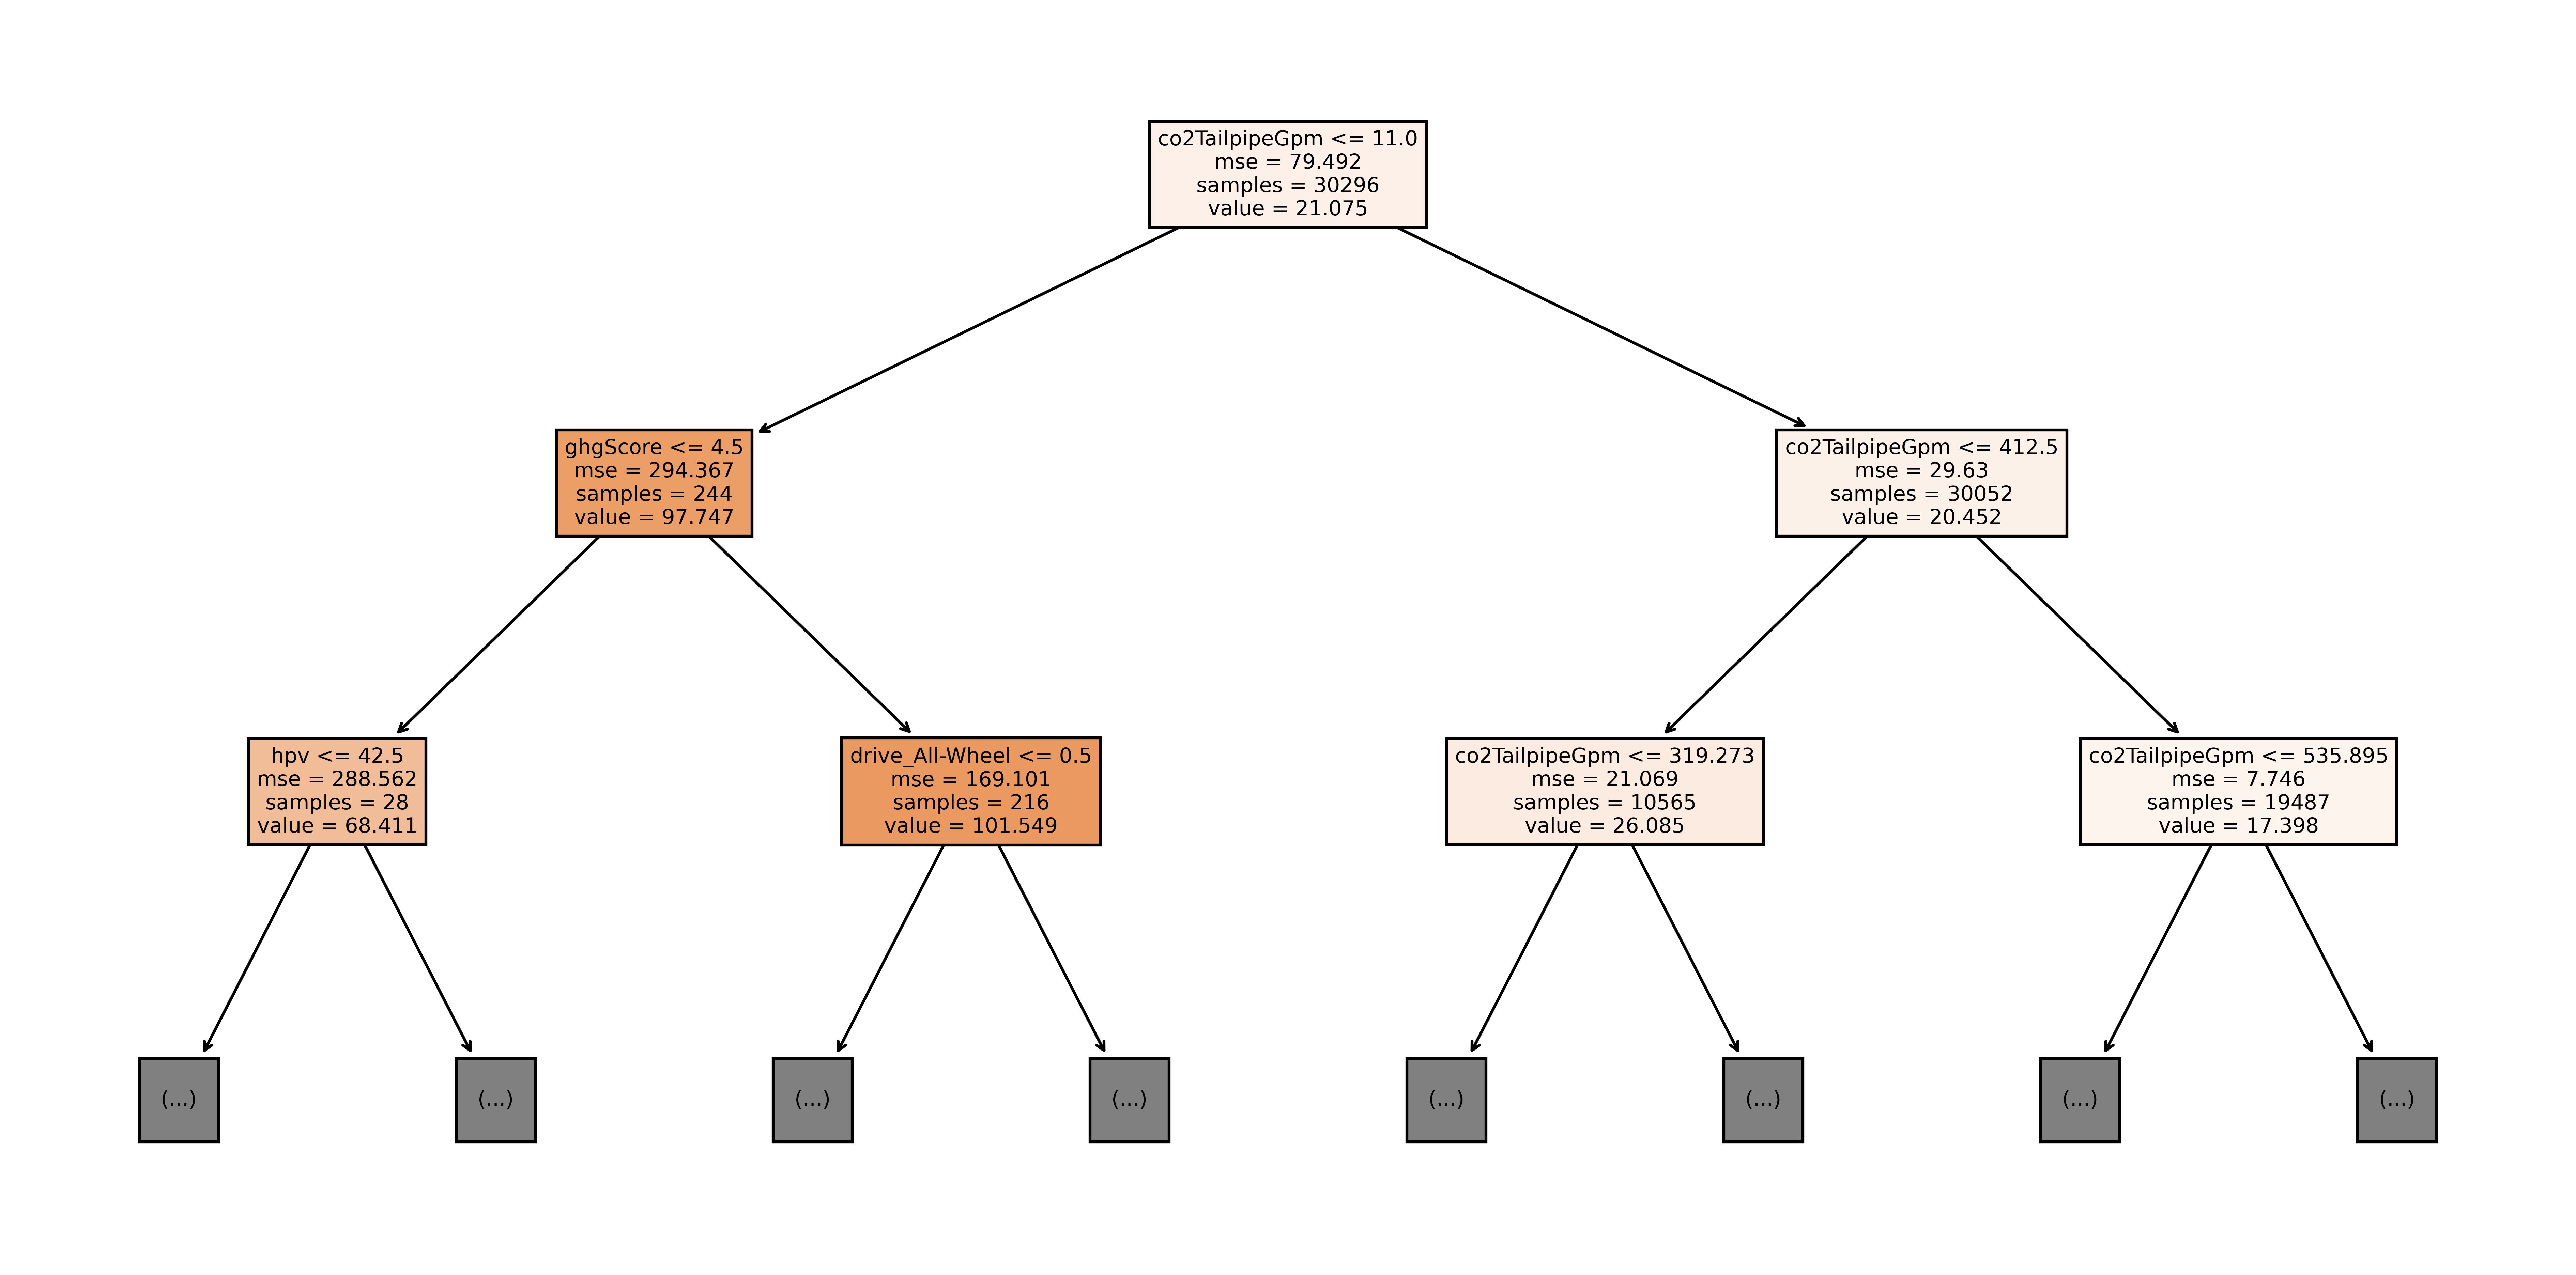

In [ ]:
sns.reset_orig()
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8), dpi=600)
tree.plot_tree(fitted_dt_surrogate,\
               feature_names=X_train.columns.values.tolist(), filled = True, max_depth=2)
fig.show()

Le modèle de réseau de neurones n'a pas de structure analogue. Néanmoins, si nous pouvons reproduire les prédictions dans une large mesure avec, cela signifie que même si fuelType_Electricity n'est pas l'une des caractéristiques les plus importantes, dans l'ensemble, c'est un point de départ essentiel. Et en effet, un arbre de décision pourrait être utile pour comprendre comment aborder au mieux le problème. Par exemple, il peut être judicieux de créer deux modèles : un pour les voitures électriques et un pour les voitures à combustibles fossiles. Pour creuser plus profondément, nous pouvons utiliser tree.export_tree comme nous l'avons vu au chapitre 3, Défis d'interprétation, ou explorer l'arbre avec l'API de scikit-learn. Pour RuleFit, nous pouvons utiliser get_rules() pour extraire les règles, filtrer celles avec un coecient de zéro, puis les trier par importance




In [ ]:
rulefit_df = fitted_rf_surrogate.get_rules()
rulefit_df = rulefit_df[rulefit_df.coef != 0]
rulefit_df.sort_values(by="importance", ascending=False)

rule  ... importance
124                         fuelType_Electricity > 0.5  ...   3.987235
4                                       co2TailpipeGpm  ...   3.484059
163                drive_2-Wheel <= 0.5 & displ <= 0.5  ...   1.387629
187            co2TailpipeGpm <= 28.5 & year <= 2012.5  ...   0.943361
112         atvType_EV <= 0.5 & co2TailpipeGpm > 413.0  ...   0.716334
..                                                 ...  ...        ...
11                                                 hlv  ...   0.003487
62                                        trany_Manual  ...   0.003142
75                                    trans_dscr_CLKUP  ...   0.002377
182  co2TailpipeGpm > 382.5 & co2TailpipeGpm <= 510...  ...   0.002150
21                                       drive_4-Wheel  ...   0.002118

[94 rows x 5 columns]

Le code précédent produit la trame de données de la figure. Cela montre que le co2TailPipeGpm linéaire est la caractéristique la plus importante, tandis que la règle fuelType_Electricity > 0.5 est la deuxième, suivie d'une règle plus longue qui inclut également fuelType_Electricity > 0.5 ! Alors, pourquoi n'avons-nous pas souligné l'importance de fuelType_Electricity avant ?

Les graphiques SHAP et ALE nous ont montré des informations intéressantes sur les caractéristiques et leur relation avec la cible et entre elles. Cependant, étant donné la complexité de XGBoost et des réseaux de neurones, ils cachent des vérités plus simples qui peuvent être mieux distillées en d'autres termes, que seuls les modèles de boîte blanche peuvent démontrer via les prédictions du modèle de boîte noire

Il y a beaucoup plus à apprendre sur les données des modèles eux-mêmes et de leurs substituts. Par exemple, vous pouvez examiner chaque interaction dans les règles supérieures de la RuleList à l'aide de tracés ALE ou explorer l'arbre de décision tout en examinant les tracés de dépendance correspondants pour chaque caractéristique, en particulier fuelType_Electricity, qui semble prometteur

## Mission accomplie 

La mission consistait à comprendre comment l'efficacité énergétique était affectée au fil des ans par les prédicteurs potentiels de l'ensemble de données. 


Nous avons déterminé que les prédicteurs d'efficacité énergétique les plus importants, de loin, sont liés à la pollution, et que le CO2 d'échappement en grammes/mile (co2TailpipeGpm) est celui qui se démarque. La pollution et l'inefficacité du carburant diminuent d'année en année. De même, ils augmentent avec le nombre de cylindres et lorsqu'il s'agit d'un moteur diesel (fuelType_Diesel). Rien de tout cela ne devrait surprendre quiconque connaît l'évolution des voitures au cours des dernières décennies. 

Cependant, il y a eu des informations révélatrices. Par exemple, les diagrammes de dépendance SHAP  nous ont aidés à comprendre pourquoi les fonctionnalités co2 et ghgScore sont redondantes. Et comme illustré par un graphique d'interaction ALE , il pourrait y avoir des problèmes de qualité des données avec co2TailpipeGpm avant 2004, qui devraient être étudiés plus avant.


 Les substituts globaux ont distillé un sens de la hiérarchie non visible dans d'autres méthodes d'interprétation. Même si, dans l'ensemble, les caractéristiques du moteur électrique (fuelType_Electricity , atvType_EV) et les caractéristiques de la transmission (trany_Manual, trans_spd) ne semblent pas importantes, elles apparaissent en haut de l'arbre de décision et dans les règles de RuleFit. 
 
 
 La hiérarchie révèle qu'ils sont de bons points de division initiaux pour prédire le MPG. Nous avons d'excellentes conclusions et des intrigues passionnantes. On peut appeler cela une mission accomplie. Néanmoins, en interprétation, avec de bonnes réponses, vous obtenez souvent aussi de bonnes questions ! Nous pouvons continuer dans le terrier du lapin et voir où cela peut mener. 
 
 
 Par exemple, une fois que vous avez supprimé les fonctionnalités redondantes, une prochaine étape pourrait consister à former un modèle distinct pour les véhicules à combustibles fossiles et électriques afin d'apprendre quels facteurs ont un impact sur le MPG et le MPGe (milles équivalents essence par gallon) séparément. Vous pouvez générer des tracés SHAP pour les deux, en juxtaposant leurs principales caractéristiques, et cela aidera peut-être à créer une histoire plus convaincante pour votre organisation